# Final Project IV: CLUSTERING

image.png

## Perkenalan

* Oleh:
1. Muhammad Rofi Ariansyah (PYTN - KS17 - 05)
2. Lathif Nur Irsyad (PYTN - KS17 - 07)
3. Anita bae (PYTN - KS17 - 09)
**Project Overview**

Project ini membahas tentang penerapan algoritma Unsupervised Learning, yaitu Clustering. Clustering adalah tugas mengelompokkan sekumpulan objek sedemikian rupa sehingga objek dalam klaster yang sama lebih mirip satu sama lain daripada objek di klaster lain. Metode Clustering yang akan digunakan adalah Principal Component Analysis (PCA) dan K-Means Clustering. PCA digunakan untuk mereduksi dimensi data yang diharapkan dapat memudahkan untuk melakukan interpretasi data dan pengelompokkan dalam klaster. Data yang digunakan dalam analisis klaster ini adalah data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut dan 8950 baris yang dapat diakses di sini. Objektif dari project ini adalah mengelompokkan pengguna kartu kredit berdasarkan kebiasaan transaksi (transaction behaviour) yang dijalankannya ke dalam beberapa klaster.

**Keterangan dataset:**

Dataset ini berisi 18 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri dan dapat dikelompokkan sebagai berikut:

1. Balance
    - `BALANCE` = Saldo jumlah yang tersisa di akun mereka untuk melakukan pembelian
    - `BALANCE_FREQUENCY` = Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1:sering diperbarui, 0:tidak sering diperbarui)

2. Purchases
    - `PURCHASES` = Jumlah pembelian yang dilakukan dari akun
    - `ONEOFF_PURCHASES` = Jumlah pembelian maksimum dilakukan dalam sekali jalan
    - `INSTALLMENTS_PURCHASES` = Jumlah pembelian yang dilakukan secara mencicil

3. Purchases Frequency
    - `PURCHASES_FREQUENCY` Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1:sering dibeli, 0:tidak sering dibeli)
    - `ONEOFF_PURCHASES_FREQUENCY` = Seberapa sering Pembelian terjadi dalam sekali jalan (1:sering dibeli, 0:tidak sering dibeli)
    - `PURCHASES_INSTALLMENTS_FREQUENCY` = Seberapa sering pembelian dengan mencicil dilakukan (1:sering dilakukan, 0:tidak sering dilakukan)
    - `PURCHASESTRX` = Jumlah transaksi pembelian yang dilakukan

4. Cash Advance
    - `CASHADVANCE` = Uang muka yang diberikan oleh pengguna
    - `CASHADVANCE_FREQUENCY` Seberapa sering uang muka dibayarkan
    - `CASH_ADVANCE_TRX` = Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"

5. Payments
    - `PAYMENTS` = Jumlah Pembayaran yang dilakukan oleh pengguna
    - `MINIMUM_PAYMENTS` = Jumlah minimum pembayaran yang dilakukan oleh pengguna
    - `PRC_FULL_PAYMENT` = Persentase pembayaran penuh yang dibayarkan oleh pengguna

6. Lainnya
    - `CUST_ID` = Identifikasi pemegang Kartu Kredit (Categorical)
    - `CREDIT_LIMIT` = Batas Kartu Kredit untuk pengguna
    - `TENURE` = Masa berlaku layanan kartu kredit untuk pengguna

## *Import* Pustaka yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import joblib

from matplotlib import colors
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

## Data *Loading*

In [2]:
path = '/content/CC GENERAL.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [6]:
# Melihat atribut dalam data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
print("jumlah baris pada data ialah",len(df),"dan jumlah kolom pada data ialah",len(df.columns))

jumlah baris pada data ialah 8950 dan jumlah kolom pada data ialah 18


## Data *Cleaning*

In [8]:
# Mengecek terdapat missing value atau tidak
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [9]:
# Menjumlahkan data yang missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Mengecek data duplikat
df.duplicated().sum()

0

Terdapat missing values pada atribut credit_limit dan minimum_payment. Karena jumlah missing valuesnya tidak terlalu banyak, maka akan dilakukan proses pengisian missing values menggunakan nilai median

In [11]:
df.CREDIT_LIMIT.fillna(value=df.CREDIT_LIMIT.median(), inplace=True)
df.MINIMUM_PAYMENTS.fillna(value=df.MINIMUM_PAYMENTS.median(), inplace=True)

In [12]:
# Mengecek kembali missing values
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Mengecek statistik untuk data numeric
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        844.906767          0.153715    11.517318  
std     2895.063757       2332.792322          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        788.713501          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Eksplorasi Data

In [14]:
# Membuat fungsi untuk memunculkan histogram masing-masing kolom
def plot_hist(feature):
    plt.figure(figsize=(12, 6))

    feature.plot(kind = 'hist')
    plt.title(f'{feature.name}')

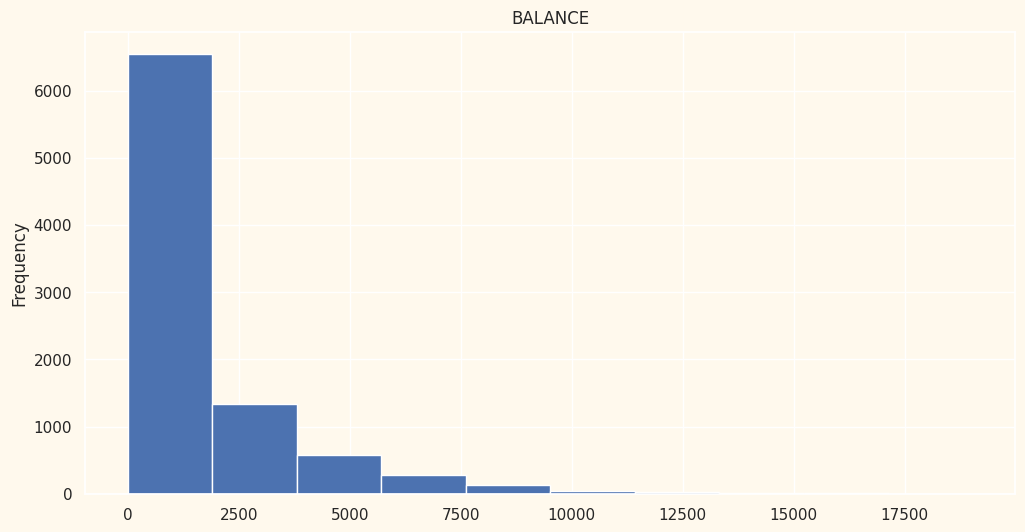

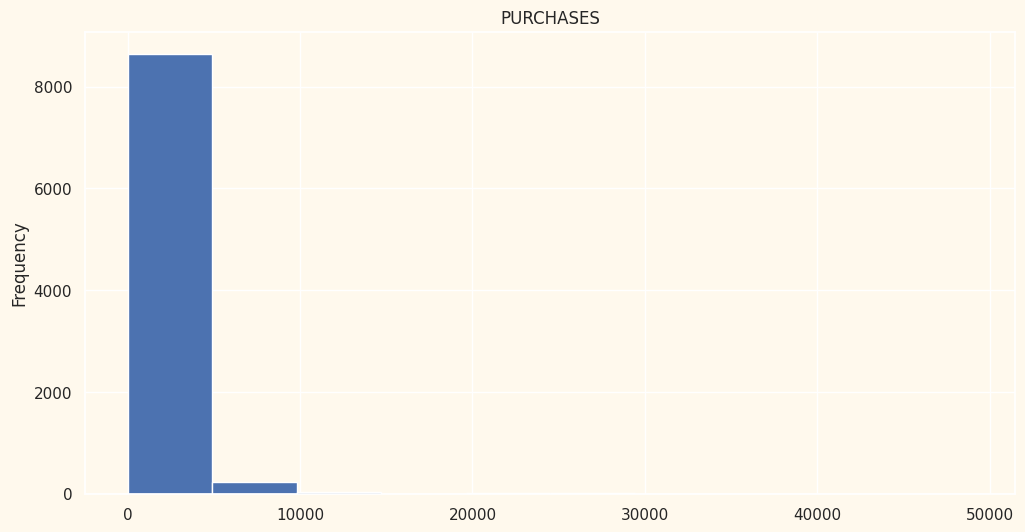

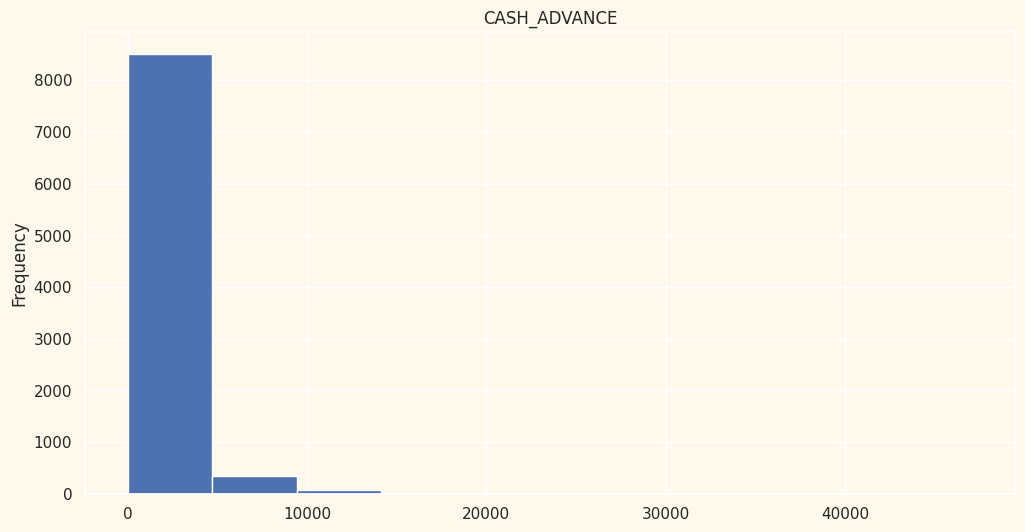

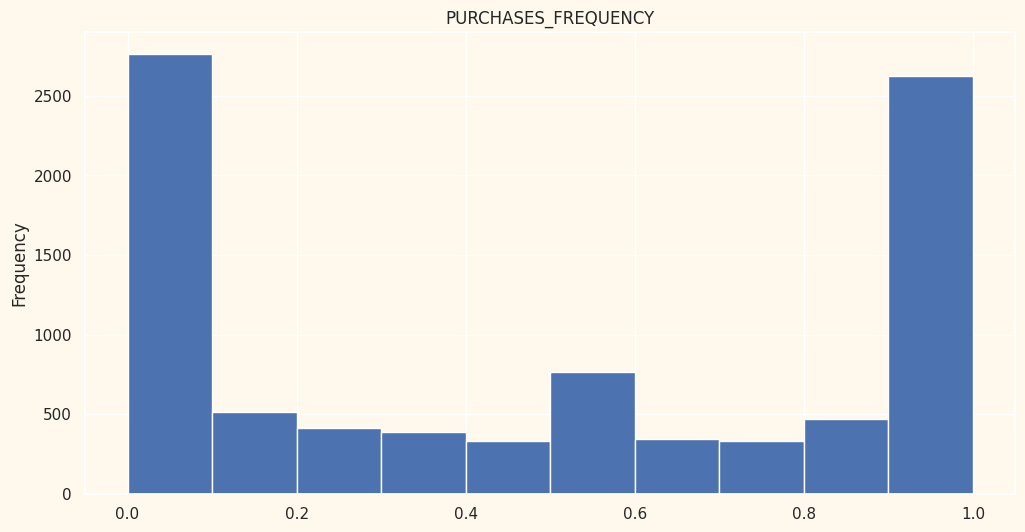

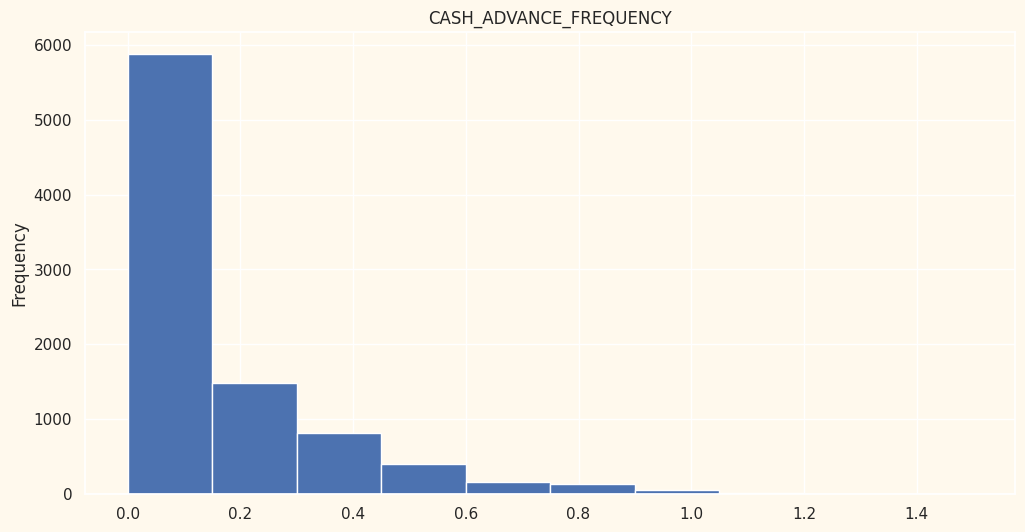

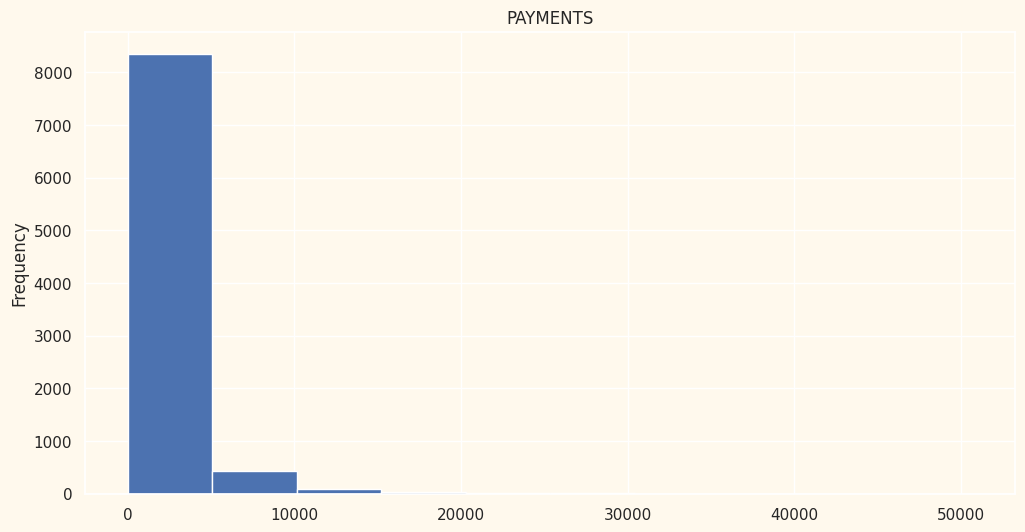

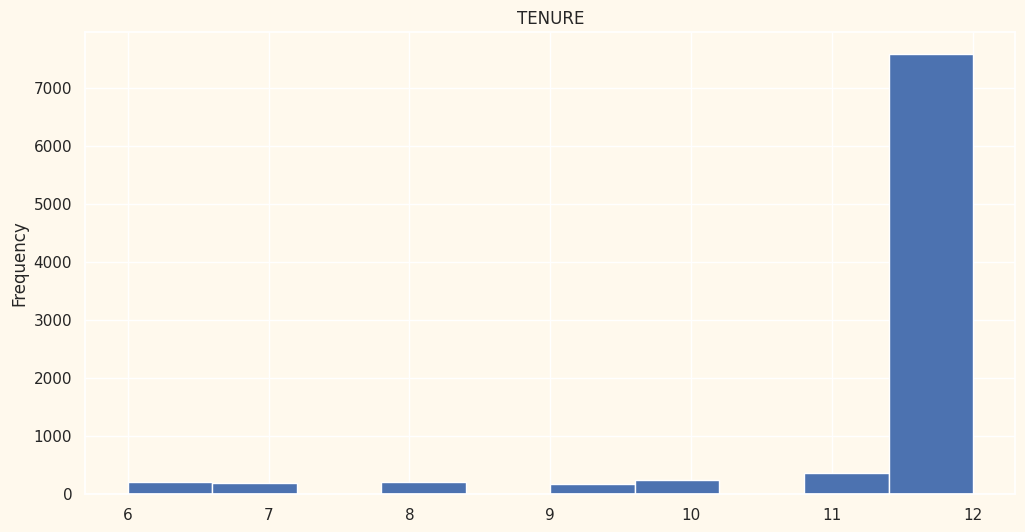

In [15]:
# visualisasi distribusi frekuensi untuk kolom yg mengandung tipe data numeric
num_feature = df.select_dtypes(exclude='object')

for i in num_feature.columns:
    plot_hist(num_feature[i])

* Analisis

PURCHASES merupakan penjumlahan dari ONE_OFF_PURCHASES dan INSTALLMENTS_PURCHASES.
TENURE memiliki mode 12 dan nilai maksimal 12.
Frekuensi terbanyak BALANCE berada dinilai terendah sebaliknya Frekuensi terbanyak BALANCE_FREQUENCY berada dinilai tertinggi.

* Kesimpulan

Sebenarnya, bisa saja untuk tidak memasukkan kolom PURCHASES karena hal tersebut merupakan gabungan dari 2 kolom yang lain.

Nilai BALANCE tidak harus sesuai dengan kondisi BALANCE_FREQUENCY karena jumlah tabungan tidak harus selalu sama dengan berapa banyak perubahan tabungan. Berapa banyak perubahan tabungan bisa dari hasil pemasukan dan pengeluaran.

In [16]:
# Korelasi antar kolom
df.corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531296           0.095931   0.356977   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.397920           0.131181   0.095789   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319735                0.256515   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.050256                0.134019   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303997             0.119833   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.140747             0.006154   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

Tabel diatas hanya digunakan untuk mengecek atau menunjukkan korelasi antar kolom

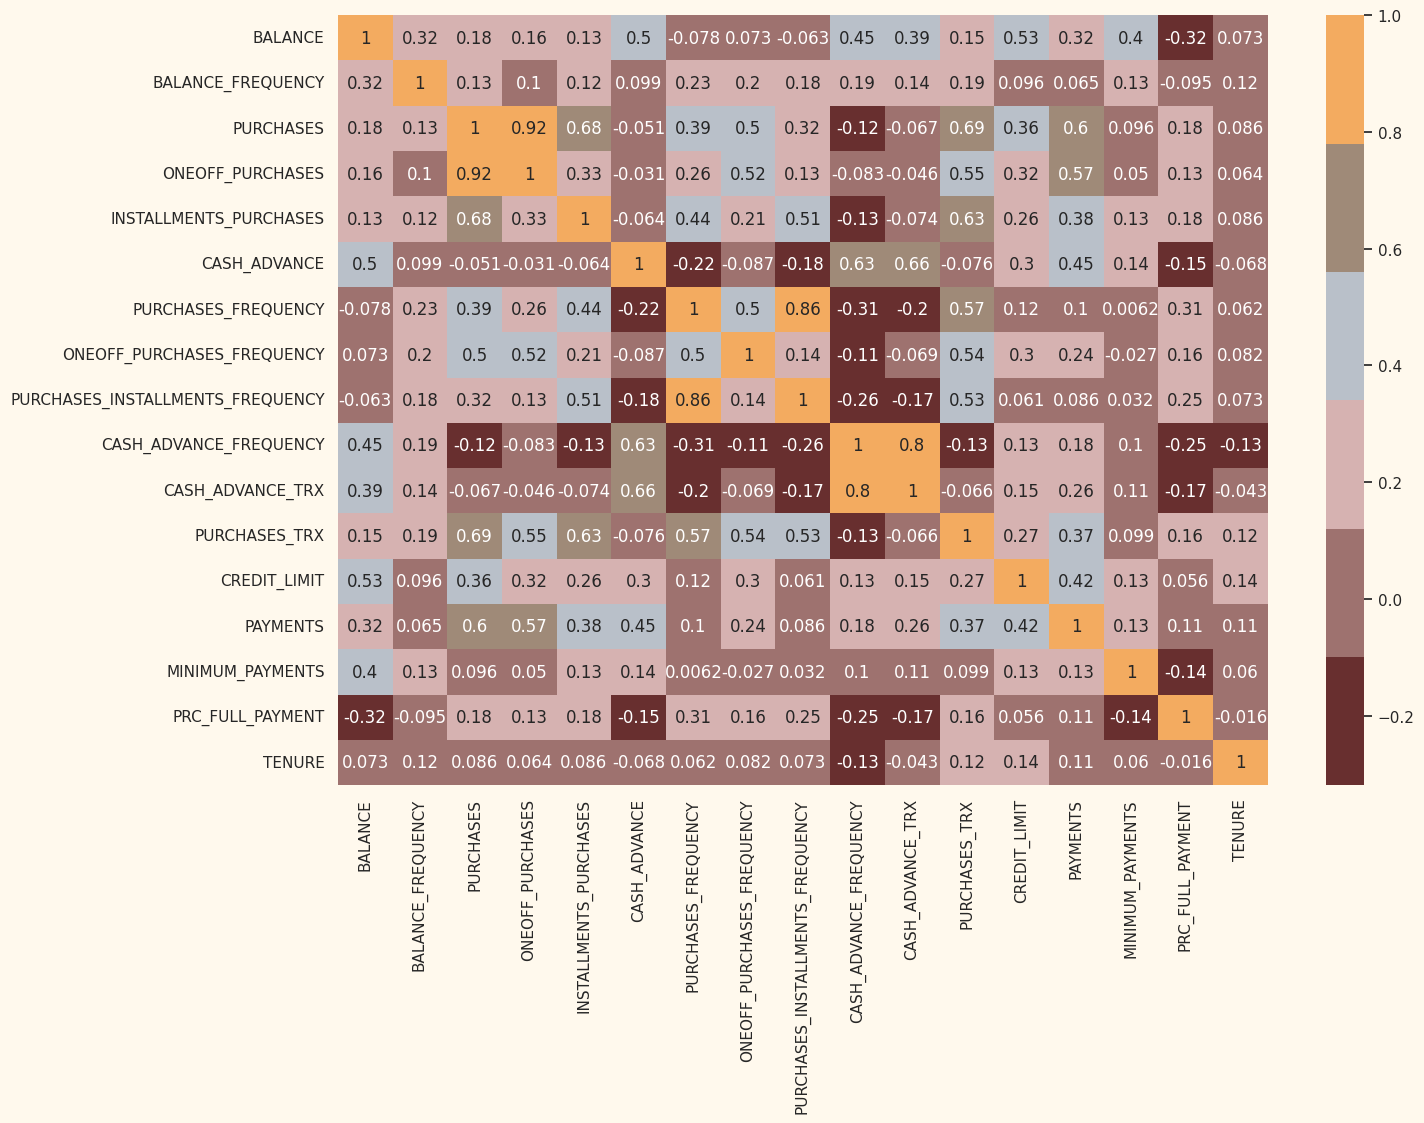

In [17]:
# Visualisasi korelasi antar kolom
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap=cmap)

**Analisis**

* PURCHASES dan ONE_OFF_PURCHASES, PURCHASES_FREQUENCY dan INSTALLMENTS_PURCHASES , serta CASH_ADVANCE_FREQUENCY dan CASH_ADVANCE_TRX memiliki nilai korelasi positif yang tinggi yaitu mencapa 0.79 ke atas.
* TENURE hampir tidak memiliki korelasi terhadap kolom-kolom lainnya karena nilai korelasi terhadap kolom lain ada di kisaran < 0.2 dan > -0.2 .

In [18]:
# Menampilkan atribut yang memiliki nilai korelasi tinggi dengan data BALANCE.
df_corr = df.corr()
df_corr2 = df_corr[(df_corr['BALANCE'] > 0.30) | (df_corr['BALANCE'] < -0.30)]
df_corr2['BALANCE'].sort_values(ascending=False)

BALANCE                   1.000000
CREDIT_LIMIT              0.531296
CASH_ADVANCE              0.496692
CASH_ADVANCE_FREQUENCY    0.449218
MINIMUM_PAYMENTS          0.397920
CASH_ADVANCE_TRX          0.385152
PAYMENTS                  0.322802
BALANCE_FREQUENCY         0.322412
PRC_FULL_PAYMENT         -0.318959
Name: BALANCE, dtype: float64

**Kesimpulan**

Untuk BALANCE, ia berkorelasi cukup tinggi dengan CREDIT_LIMIT, CASH_ADVANCE,CASH_ADVANCE_FREQUENCY, dan MINIMUM_PAYMENTS .

## Data *Preprocessing*

In [19]:
# Dilakukan drop pada kolom CUST_ID karena bertipe data kategori
df.drop('CUST_ID', axis=1, inplace=True)

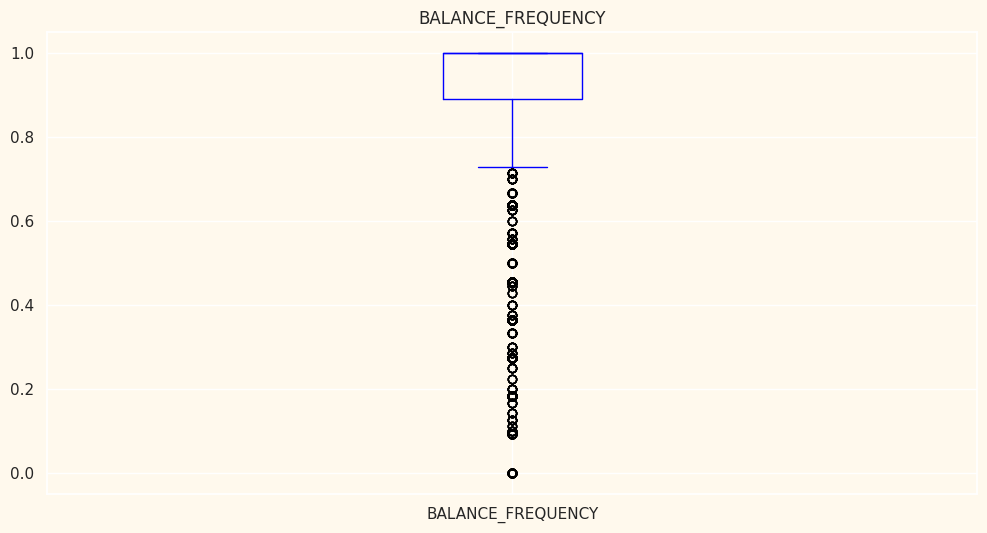

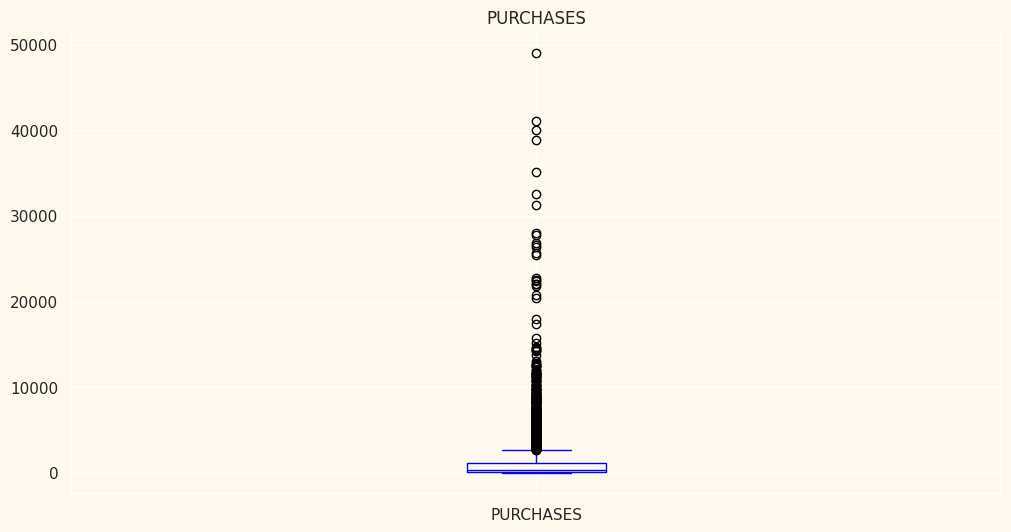

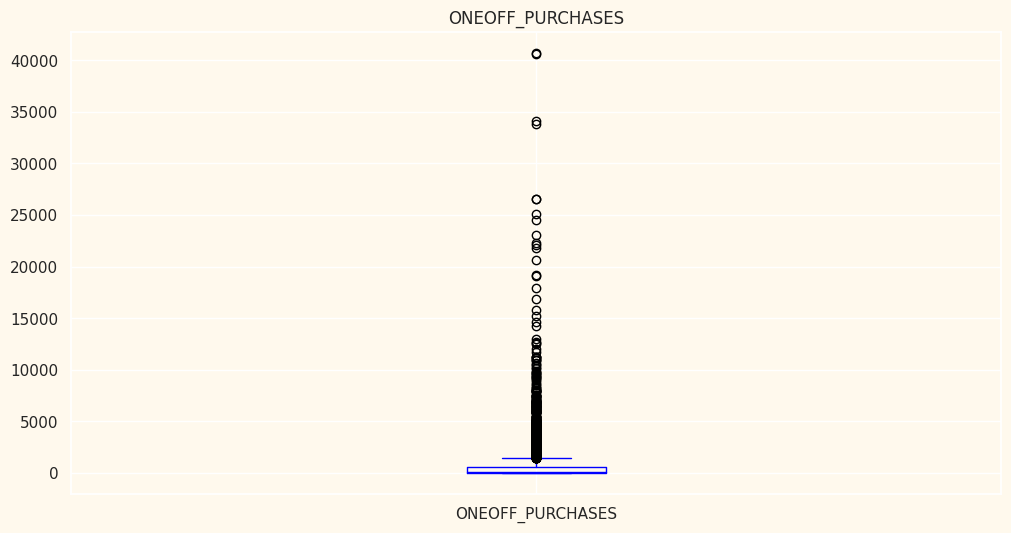

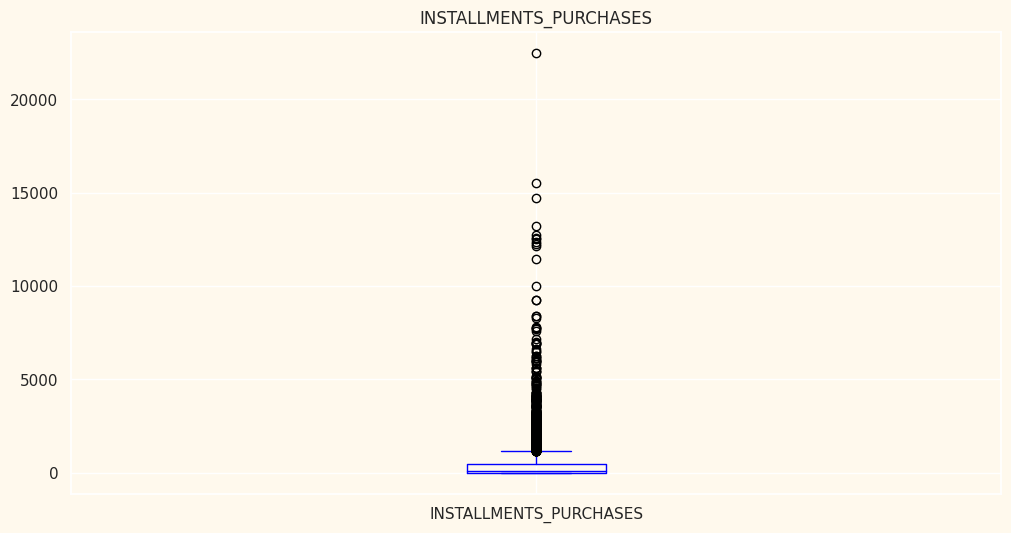

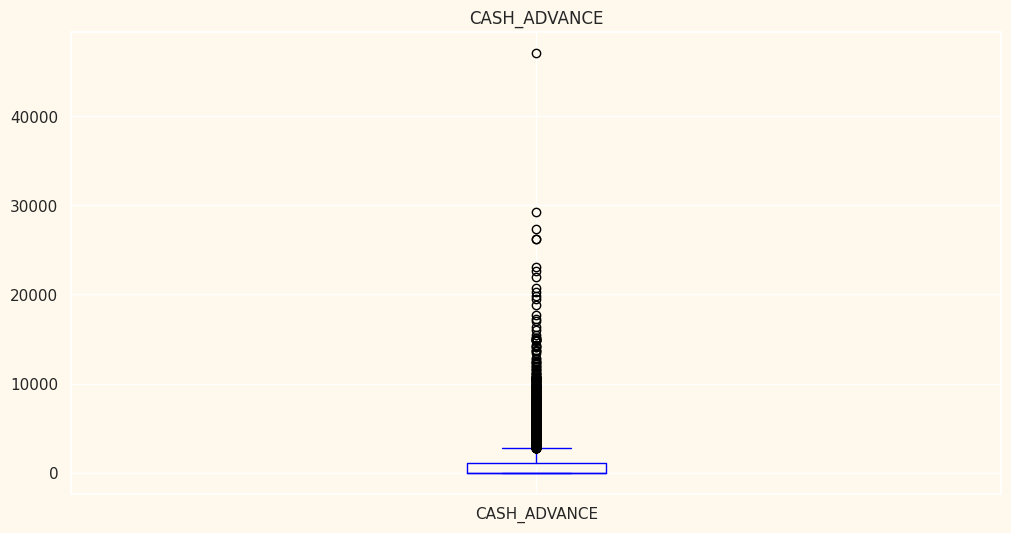

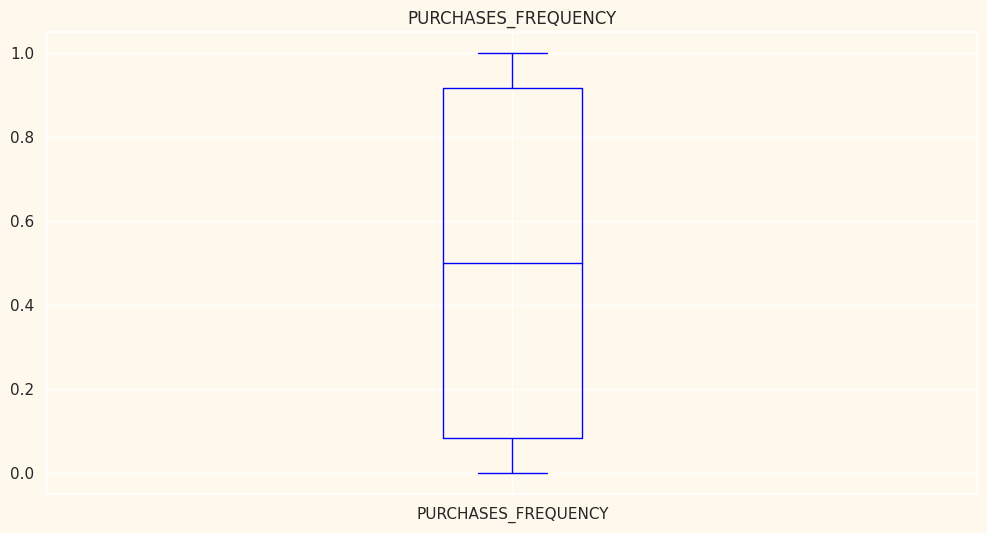

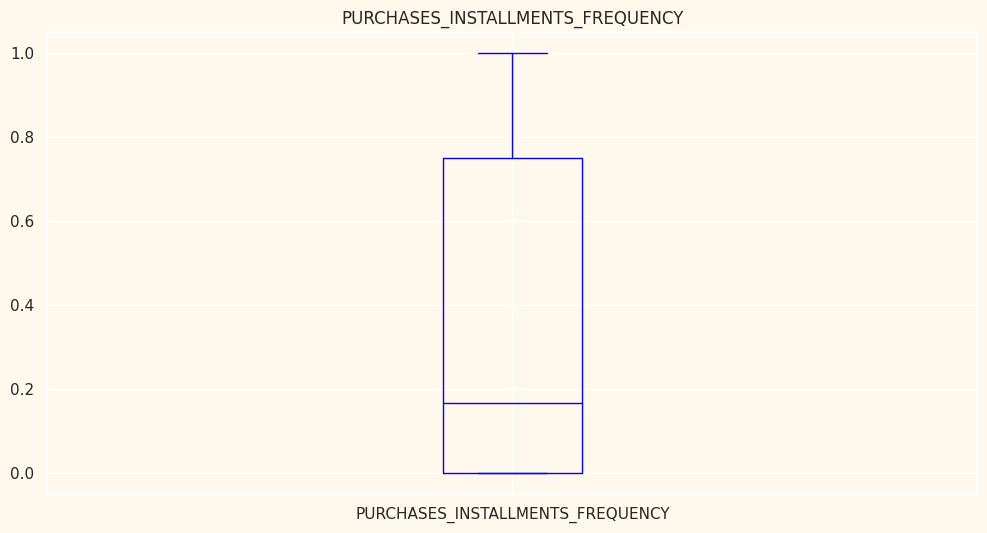

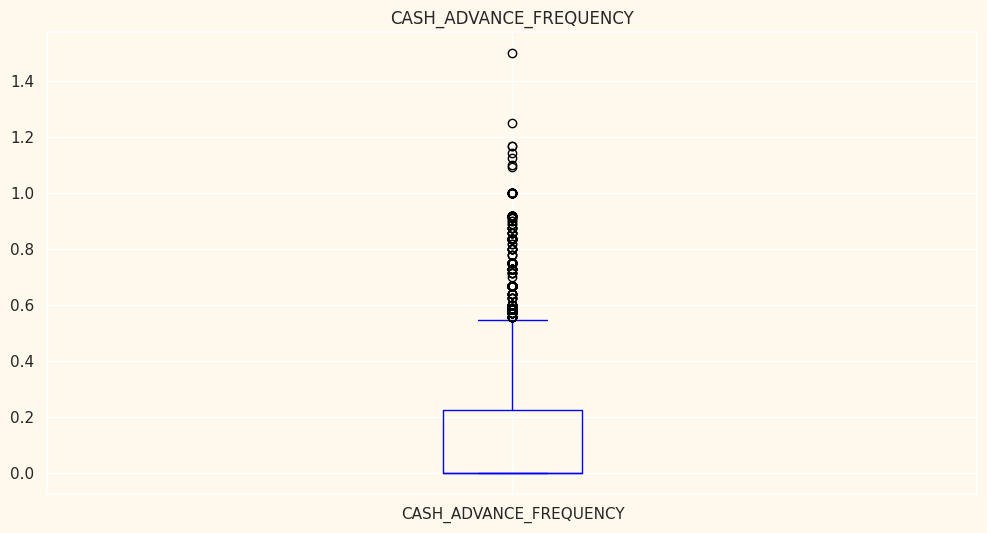

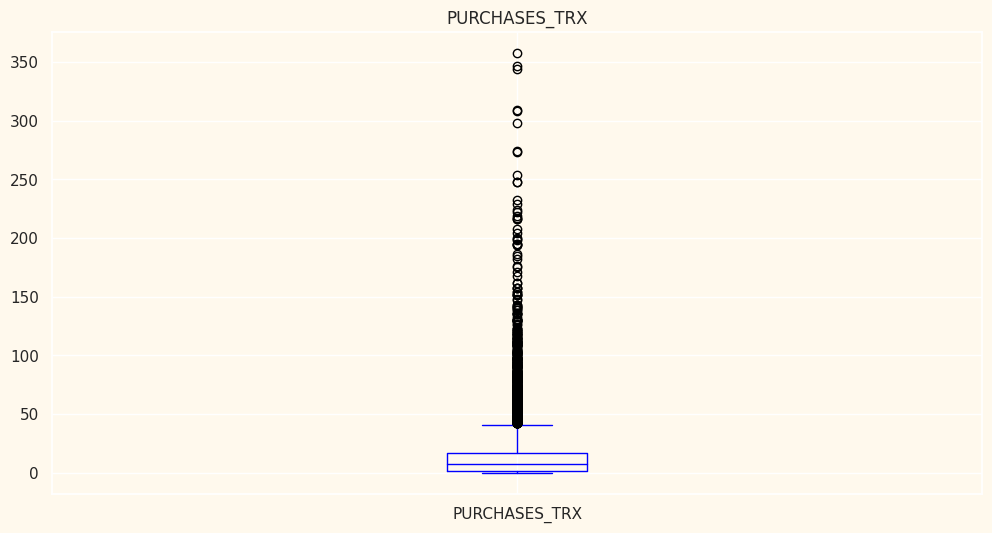

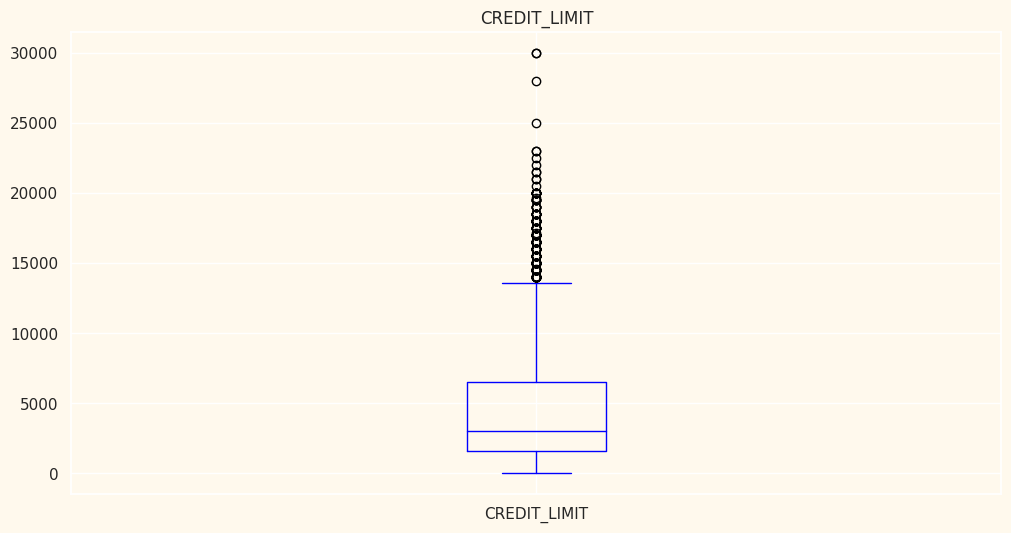

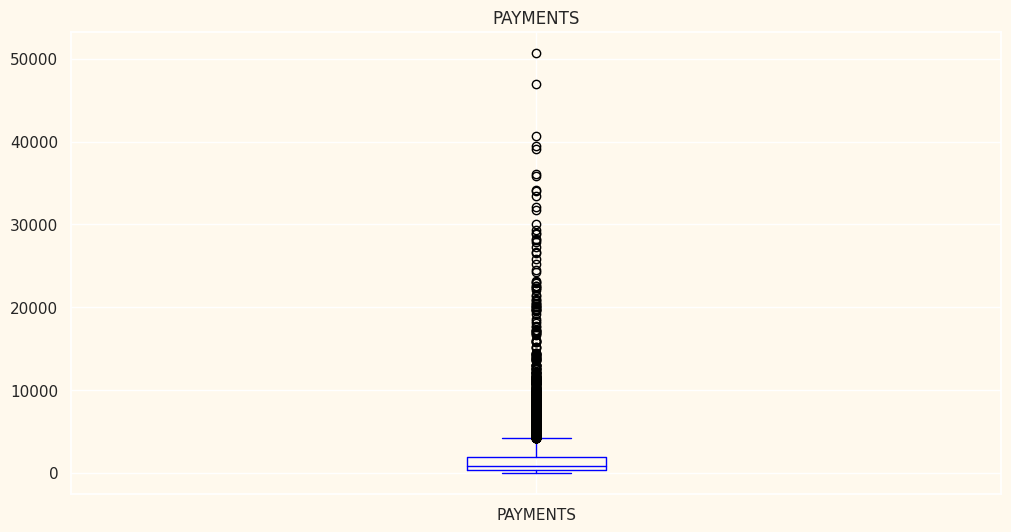

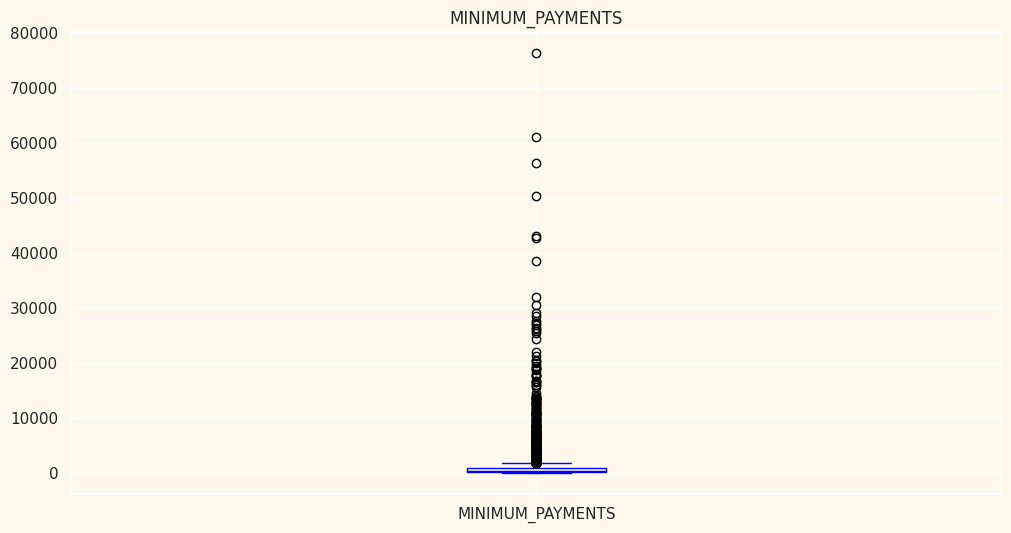

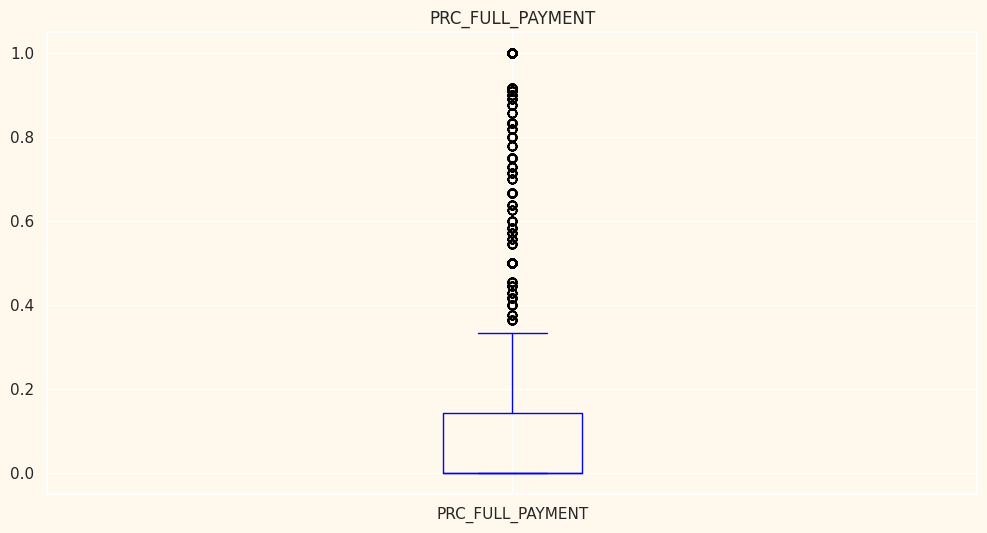

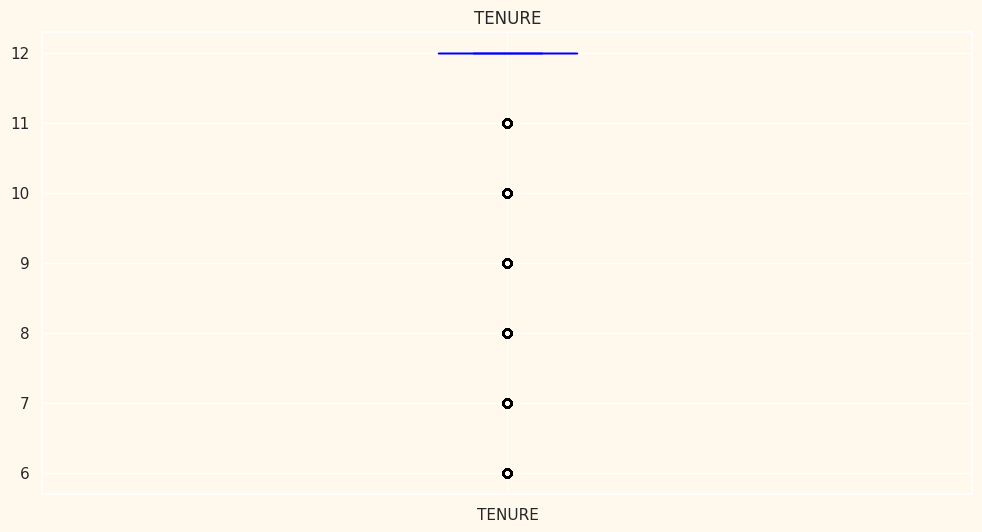

In [20]:
# Membuat fungsi untuk memunculkan boxplot masing-masing kolom
def plot_box(feature):
    plt.figure(figsize=(12, 6))
    feature.plot(kind = 'box', color='blue')
    plt.title(f'{feature.name}')

num_feature = df.select_dtypes(exclude='object')

for i in num_feature.columns:
    plot_box(num_feature[i])

Diketahui bahwa data memiliki banyak outlier dan bukan solusi yang baik untuk menghilangkan outlier tersebut, sehingga data akan dilakukan standarisasi menggunakan StandardScaler untuk menghasilkan distribusi Normal

### Scalling

In [21]:
#Scaling
scaling = StandardScaler()
scaling.fit(df)
scaling_df = pd.DataFrame(scaling.transform(df),columns= df.columns )
print("Semua fitur sekarang sudah diskalakan")

Semua fitur sekarang sudah diskalakan


In [22]:
# Data yang diskalakan untuk digunakan untuk mengurangi dimensi/reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaling_df

Dataframe to be used for further modelling:


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960378   
1                   0.573963          0.110074      -0.591796      0.688678   
2                  -0.675349         -0.476070      -0.109020      0.826100   
3                  -0.258913         -0.329534      -0.551565      0.826100   
4                  -0.675349         -0.476070      -0.551565     -0.905410   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960378   
8946               -0.675349         -0.476070      -0.350408     -0.960378   
8947               -0.675349         -0.476070      -0.390639     -0.960378   
8948                0.157527         -0.182998      -0.591796     -1.097800   
8949                0.990398         -0.182998       0.333524     -0.905410   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.528979         -0.302400         -0.525551  0.360680  
1     0.818642          0.097500          0.234227  0.360680  
2    -0.383805         -0.093293         -0.525551  0.360680  
3    -0.598688         -0.228307         -0.525551  0.360680  
4    -0.364368         -0.257266         -0.525551  0.360680  
...        ...               ...               ...       ...  
8945 -0.486217         -0.341250          1.183951 -4.122768  
8946 -0.503396         -0.228307         -0.525551 -4.122768  
8947 -0.570615         -0.326875          0.329200 -

**Setelah dilakukan scaling, dataset memiliki rentang nilai yang tidak terlalu jauh. Selanjutnya akan coba ditampilkan kembali boxplot dari data yang telah di standarisasi**

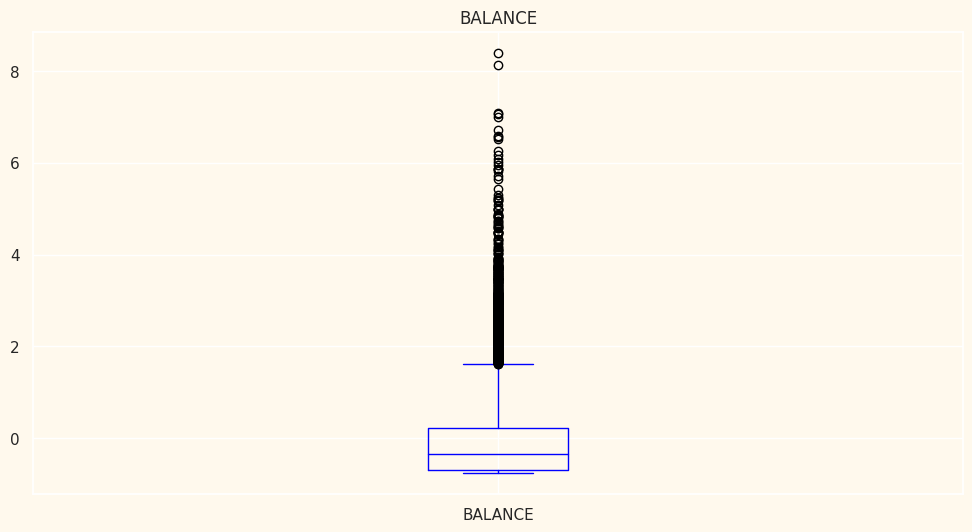

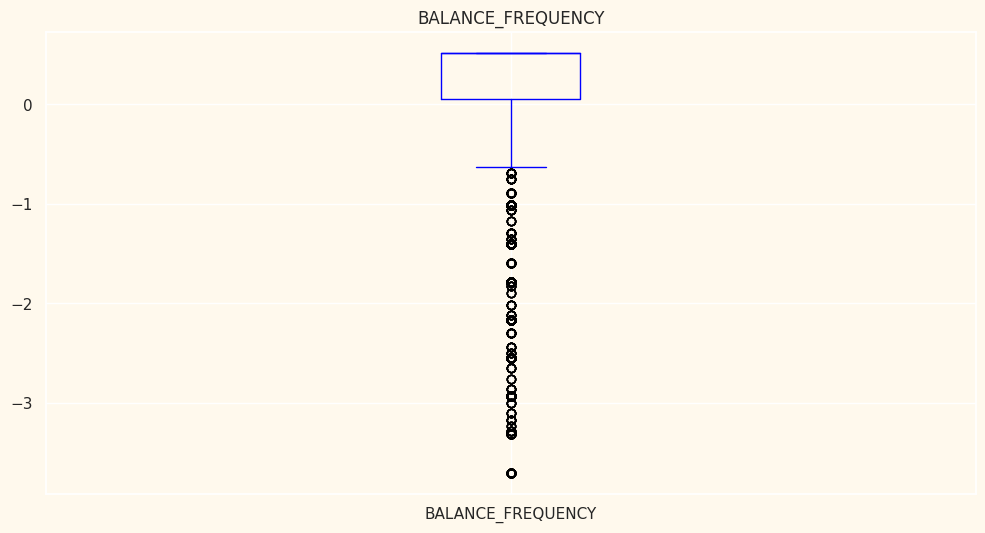

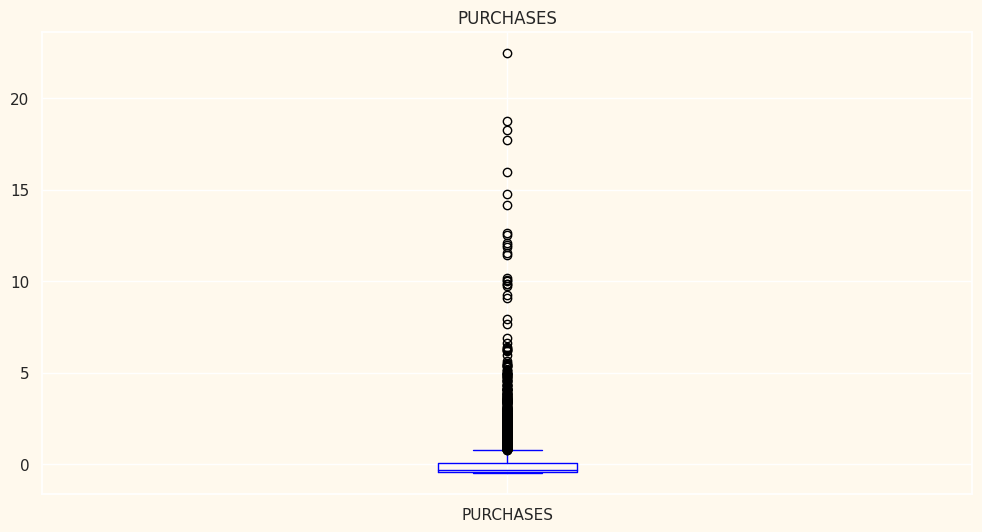

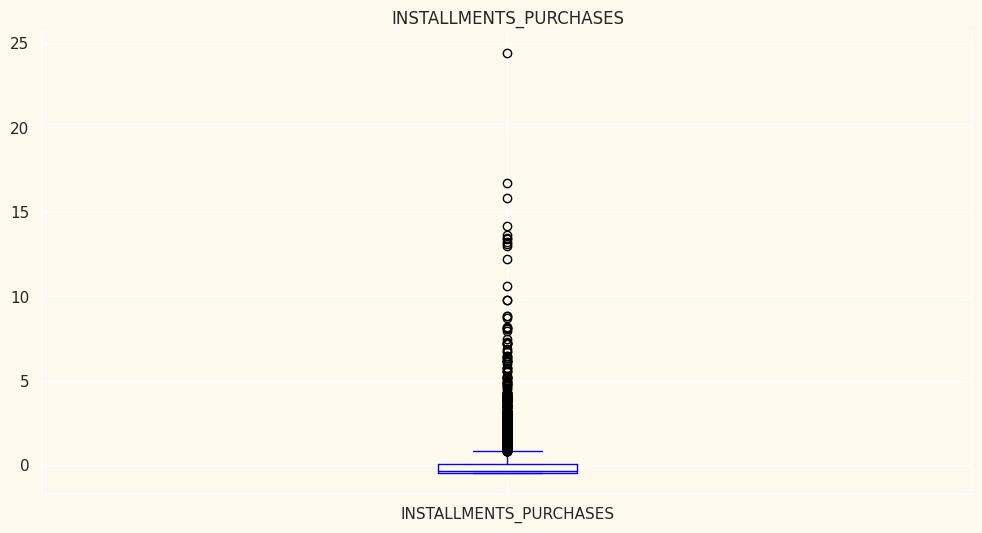

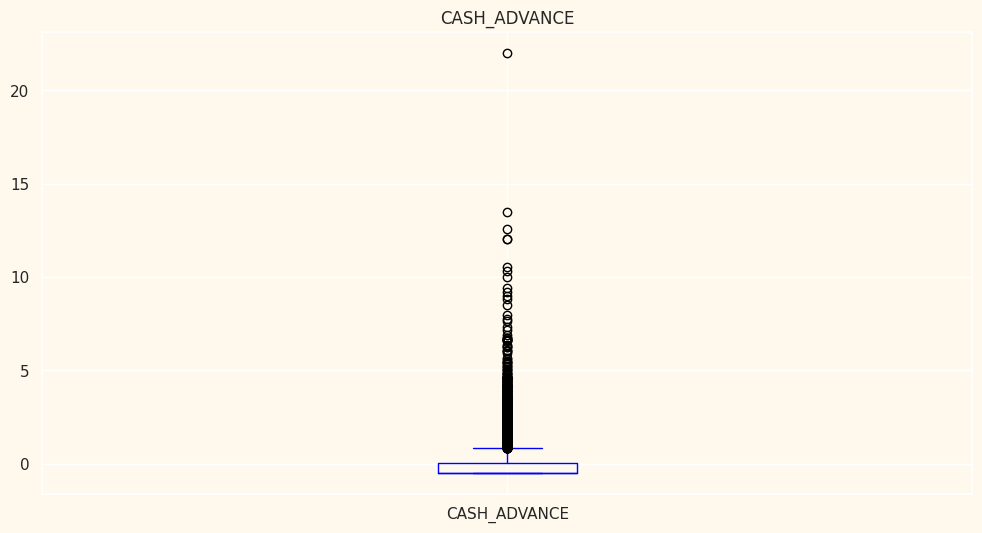

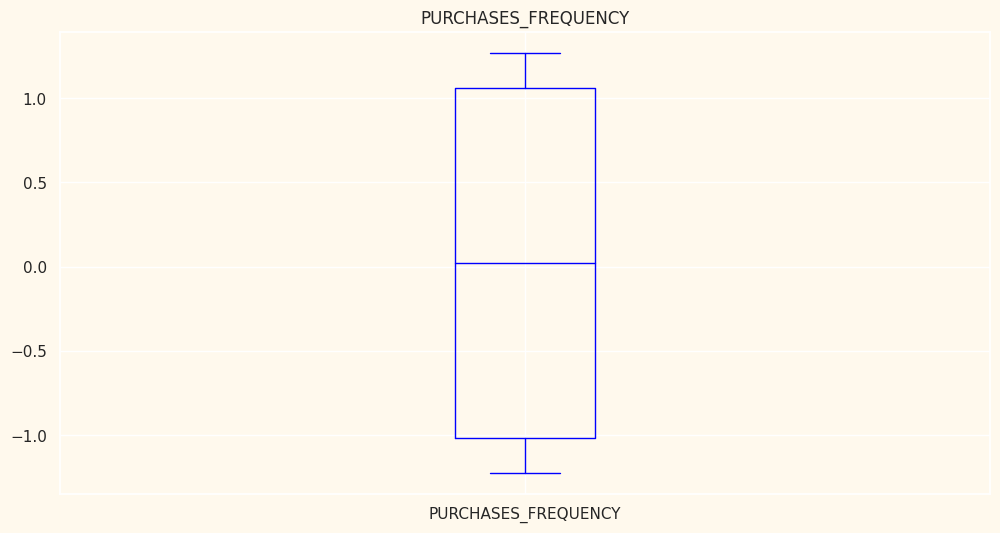

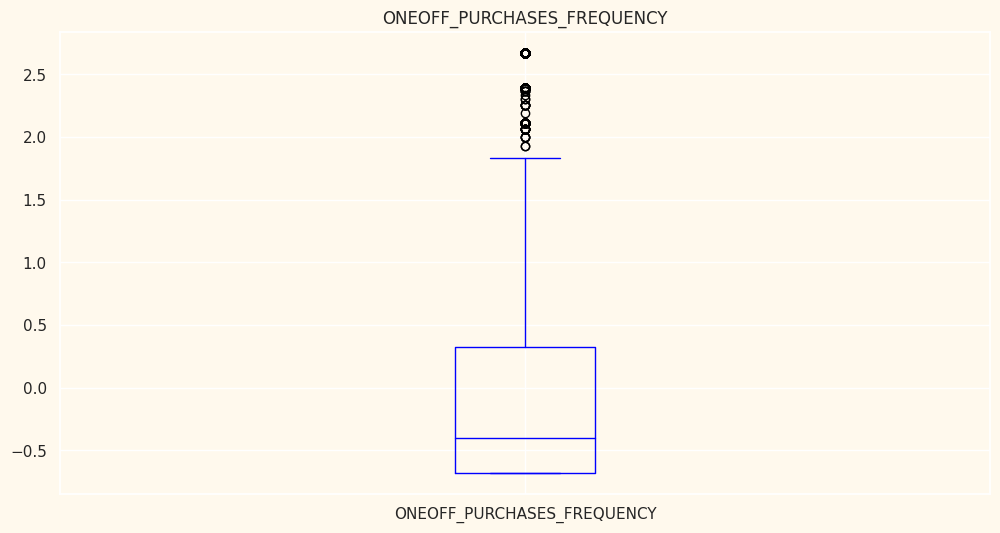

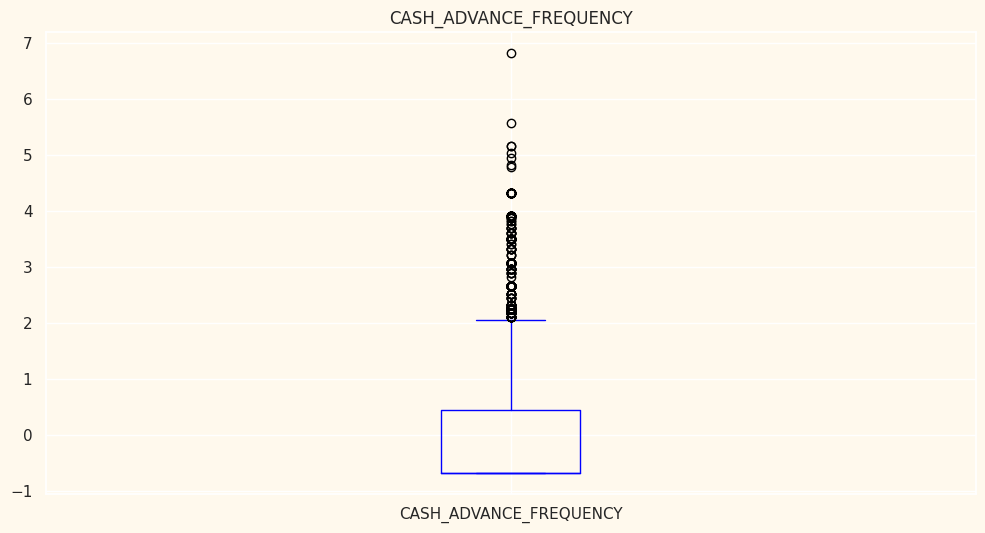

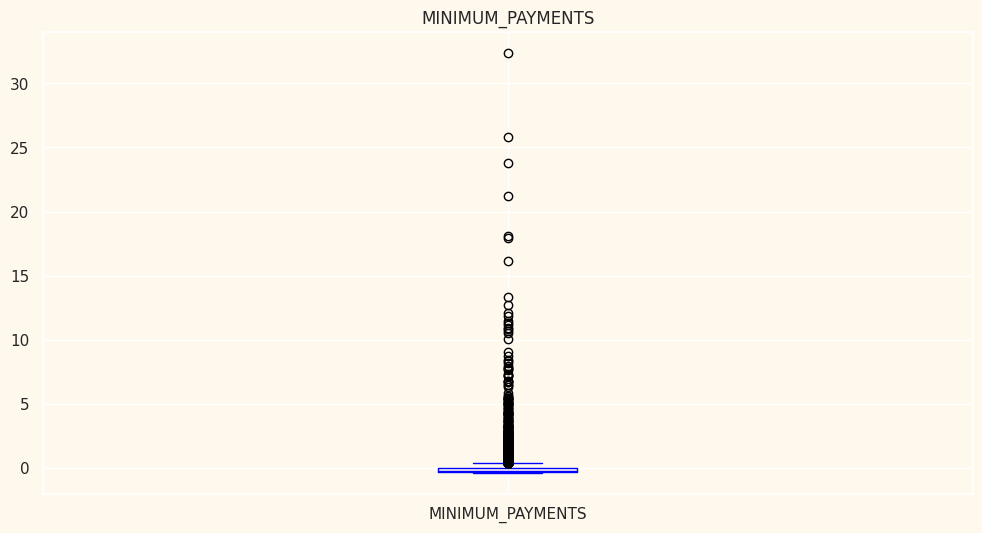

In [23]:
num_feature = scaling_df.select_dtypes(exclude='object')

for i in num_feature.columns:
    plot_box(num_feature[i])

**Meskipun data masih mengandung outlier, tetapi nilai setiap atribut menjadi lebih kecil. Bisa dilihat pada Y-axisnya.**

**Setiap atribut yang memiliki outlier, tidak akan dihapus. Karena kami berpendapat bahwa jika dilakukan penghapusan pada outlier mungkin dapat mempengaruhi hasil akhir clusternya. Sehingga, kami tetap menggunkana dataframe scaling_df**

### PCA

Dalam masalah ini, ada banyak faktor yang menjadi dasar klasifikasi akhir akan dilakukan. Faktor-faktor ini pada dasarnya adalah atribut atau fitur. Semakin tinggi jumlah fitur, semakin sulit untuk bekerja dengannya. Banyak dari fitur ini berkorelasi, dan karenanya berlebihan/redundant. Inilah sebabnya mengapa kita akan melakukan pengurangan dimensi pada fitur yang dipilih sebelum menempatkannya melalui pengklasifikasi. Pengurangan dimensi/Dimensionality reduction adalah proses mengurangi jumlah variabel acak yang dipertimbangkan, dengan memperoleh satu set variabel utama.

Principal component analysis (PCA) adalah teknik untuk mengurangi dimensi kumpulan data tersebut, meningkatkan kemampuan interpretasi tetapi pada saat yang sama meminimalkan kehilangan informasi.

Langkah - langkah pada bagian ini:

Pengurangan dimensi dengan PCA
Plotting the reduced dataframe
Dimensionality reduction with PCA

Untuk kasus ini, kita akan mengurangi dimensi menjadi 2.

In [24]:
pca = PCA(n_components=2)
pca.fit(scaling_df)
PCA_ds = pd.DataFrame(pca.transform(scaling_df), columns=(["Principal Component 1", "Principal Component 2"]))
PCA_ds.head()

Principal Component 1  Principal Component 2
0              -1.683649              -1.072241
1              -1.134085               2.509150
2               0.969395              -0.383578
3              -0.888220               0.004649
4              -1.600021              -0.683795

In [25]:
pca.explained_variance_ratio_

array([0.27297671, 0.2031378 ])

**Metode diatas digunakan untuk mendapatkan rasio varians. Jadi pada PCA 1 itu memiliki nilai varians sebanyak 27% dari 100%, dan PCA 2 memiliki nilai 20% dari 100%. Sehingga jika di jumlahkan keduanya memiliki sekitar 47% dari 100%.**

### Clustering

Sekarang kita telah mengurangi atribut menjadi dua dimensi, kita akan melakukan pengelompokan melalui elbow method

Langkah-langkah yang dilakukan dalam Clustering

* Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk
* Memeriksa cluster yang terbentuk melalui scatter plot

In [26]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:')
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(PCA_ds)
Elb.show()

Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:


<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

**Berdasarkan visualisasi elbow method, Nilai K paling optimal adalah 5. Dengan begitu, jumlah cluster terbentuk sebanyak 5**

## Model

### Pemodelan K-Means Clustering

In [27]:
X = scaling_df

In [28]:
# Mendefinisikan model kmeans dengan jumlah klaster sebanyak 5
kmeans= KMeans(n_clusters=5, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)

In [29]:
# Fitting data scaled dengan model K-means
kmeans.fit(X)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(5, 17)

**Terdapat 5 klaster pada 17 atribut yang digunakan**

### Evaluasi Model

In [30]:
# Mencari nilai rata-rata setiap cluster
cls_avg = pd.DataFrame(data = kmeans.cluster_centers_, columns = [scaling_df.columns])
cls_avg

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.246779         -0.339398 -0.339031        -0.220898   
1  1.430238          0.419467  6.915048         6.083034   
2  0.158653          0.431358  0.896181         0.840422   
3  1.466551          0.382502 -0.238739        -0.174952   
4 -0.441404          0.105639 -0.096115        -0.256440   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.395667    -0.171390           -0.814682   
1               5.172266     0.038778            1.090699   
2               0.574939    -0.298137            1.080315   
3              -0.243170     1.737917           -0.522707   
4               0.243816    -0.381893            0.912194   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.353873                        -0.751613   
1                   1.879303                         1.049413   
2                   1.782363                         0.556321   
3                  -0.241364                        -0.458500   
4                  -0.398972                         1.080896   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.082293        -0.152860     -0.473096    -0.316631   
1              -0.249227        -0.038166      4.646228     2.198396   
2              -0.384338        -0.306754      1.159997     0.682020   
3               1.776962         1.670580     -0.295369     0.839270   
4              -0.485297        -0.372129      0.077893    -0.356042   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.251299        -0.123040        -0.283943 -0.046351  
1  4.783704         1.088198         0.824001  0.334613  
2  0.360735        -0.009207         0.382944  0.276932  
3  0.641413         0.504785        -0.402845 -0.102454  
4 -0.275619        -0.074860         0.403708 -0.046513

In [31]:
# Lakukan invers pada data yang telah di standarisasi untuk memahami karakter dari data dan setiap kolom
cls_avg_invers = scaling.inverse_transform(cls_avg)
cls_avg_invers = pd.DataFrame(data = cls_avg,columns = [scaling_df.columns])
cls_avg_invers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.246779         -0.339398 -0.339031        -0.220898   
1  1.430238          0.419467  6.915048         6.083034   
2  0.158653          0.431358  0.896181         0.840422   
3  1.466551          0.382502 -0.238739        -0.174952   
4 -0.441404          0.105639 -0.096115        -0.256440   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.395667    -0.171390           -0.814682   
1               5.172266     0.038778            1.090699   
2               0.574939    -0.298137            1.080315   
3              -0.243170     1.737917           -0.522707   
4               0.243816    -0.381893            0.912194   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.353873                        -0.751613   
1                   1.879303                         1.049413   
2                   1.782363                         0.556321   
3                  -0.241364                        -0.458500   
4                  -0.398972                         1.080896   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.082293        -0.152860     -0.473096    -0.316631   
1              -0.249227        -0.038166      4.646228     2.198396   
2              -0.384338        -0.306754      1.159997     0.682020   
3               1.776962         1.670580     -0.295369     0.839270   
4              -0.485297        -0.372129      0.077893    -0.356042   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.251299        -0.123040        -0.283943 -0.046351  
1  4.783704         1.088198         0.824001  0.334613  
2  0.360735        -0.009207         0.382944  0.276932  
3  0.641413         0.504785        -0.402845 -0.102454  
4 -0.275619        -0.074860         0.403708 -0.046513

In [32]:
# Menambahkan kolom cluster pada dataframe
df_clusters = pd.concat([scaling_df, pd.DataFrame({'cluster':labels})], axis=1)
df_clusters.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  cluster  
0 -0.528979         -0.302400         -0.525551  0.36068        0  
1  0.818642          0.097500          0.234227  0.36068        3  
2 -0.383805         -0.093293         -0.525551  0.36068        2  
3 -0.598688         -0.228307         -0.525551  0.36068        0  
4 -0.364368         -0.257266         -0.525551  0.36068        0

### Distribusi frekuensi setiap atribut berdasarkan cluster

#### Cluster 0

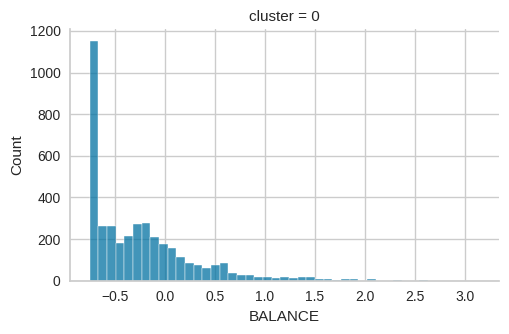

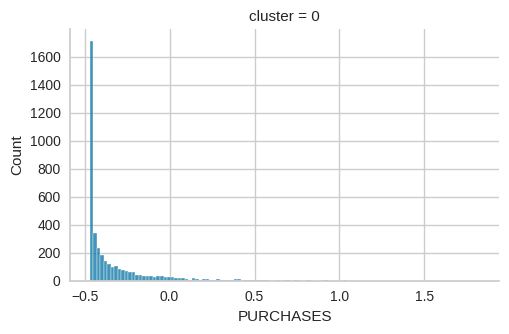

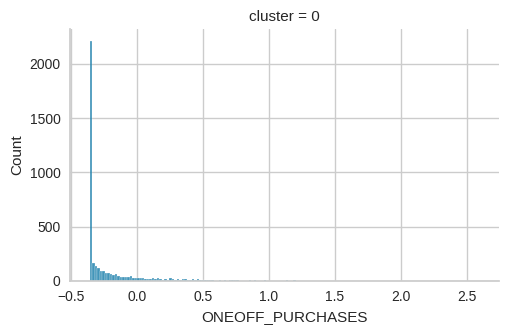

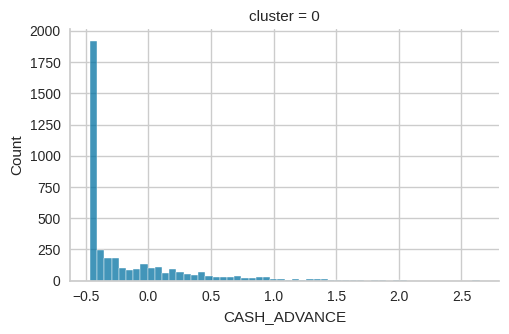

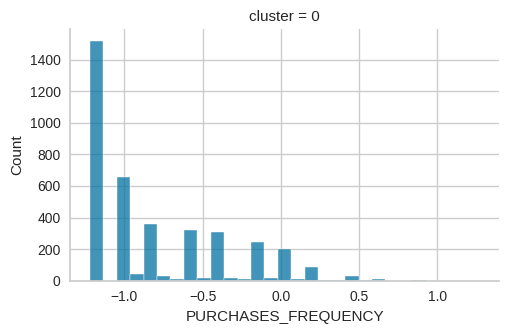

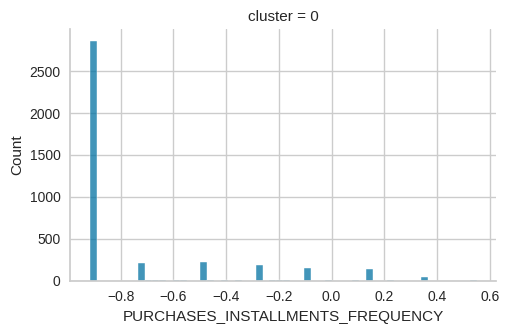

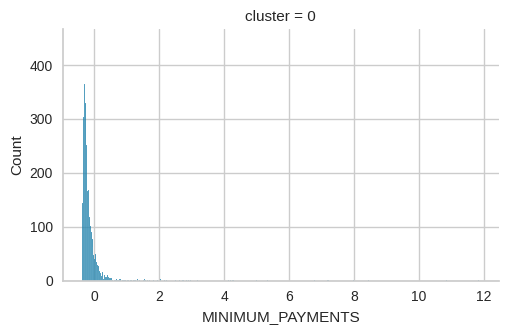

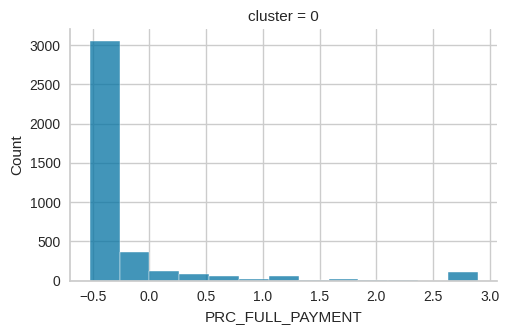

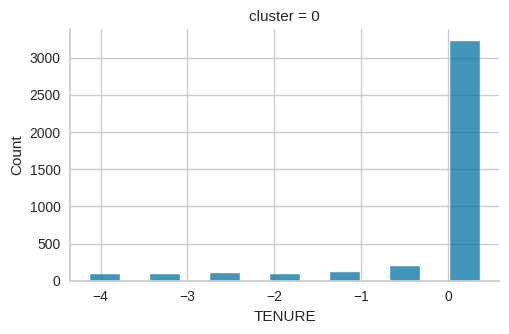

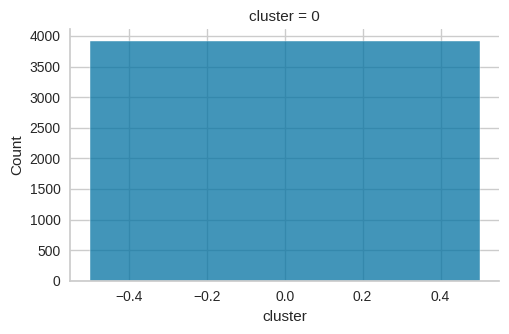

In [33]:
df_clusters0 = df_clusters[(df_clusters['cluster'] == 0)]

for i in df_clusters0:
    g = sns.FacetGrid(df_clusters0, col='cluster', height=3.5, aspect=1.5)
    g.map(sns.histplot, i)

#### Cluster 1

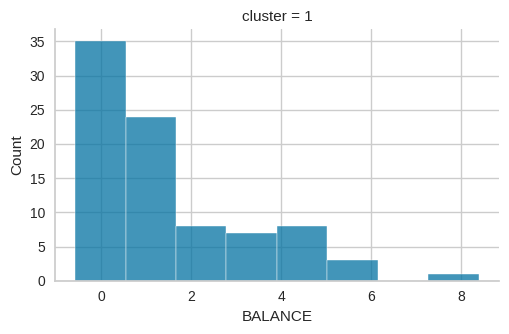

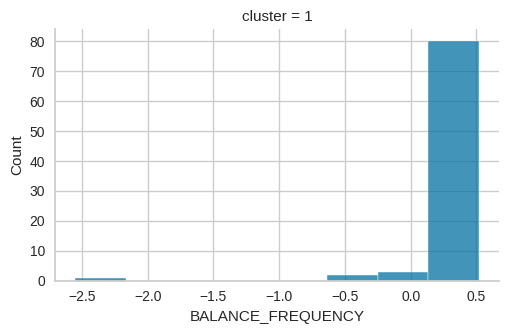

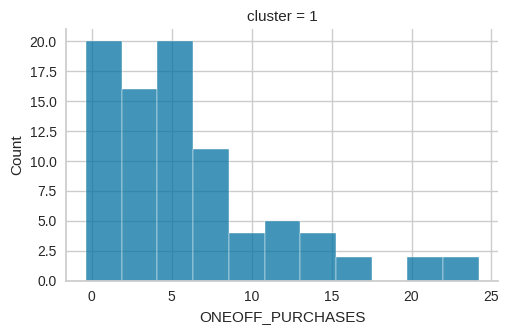

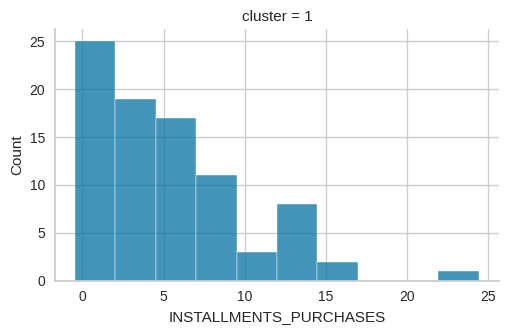

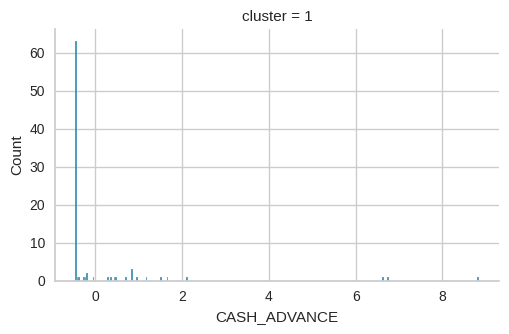

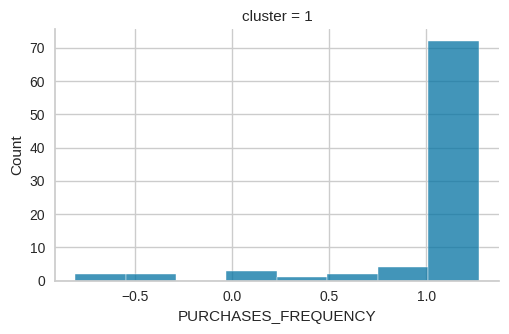

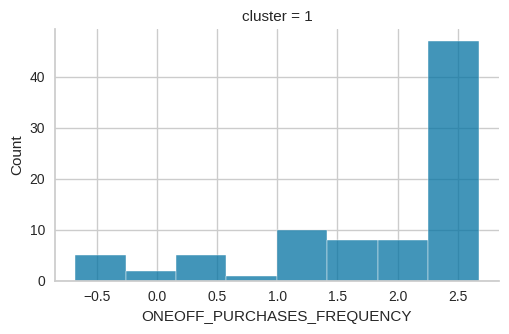

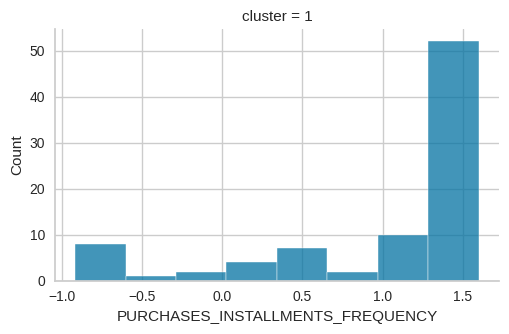

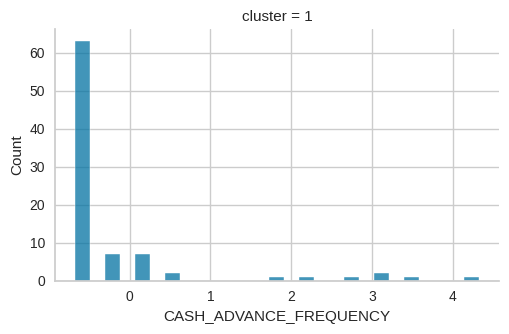

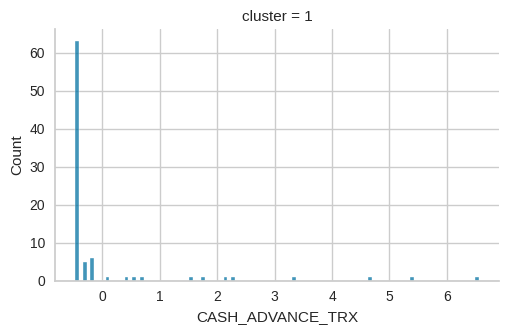

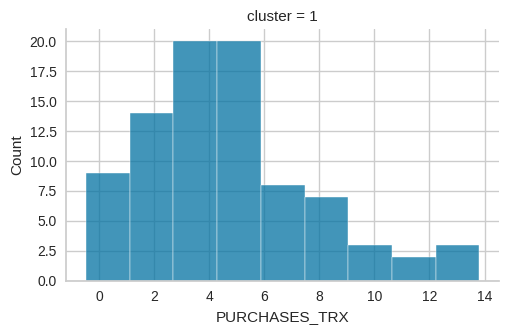

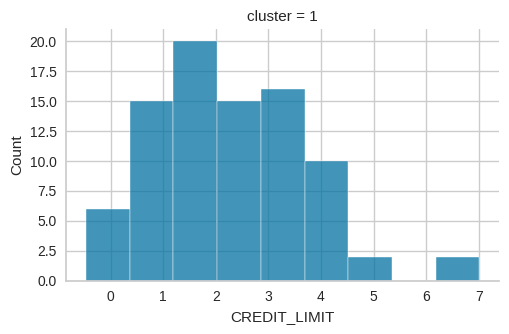

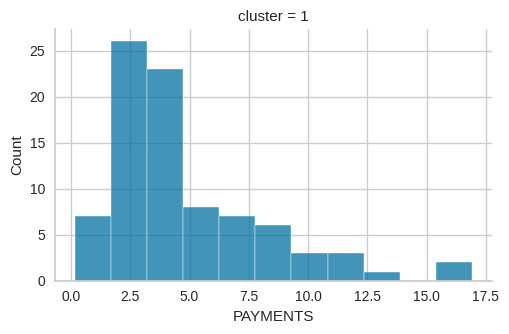

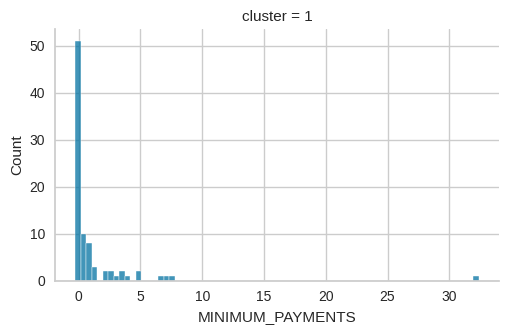

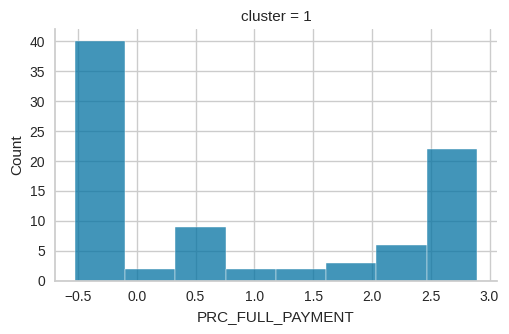

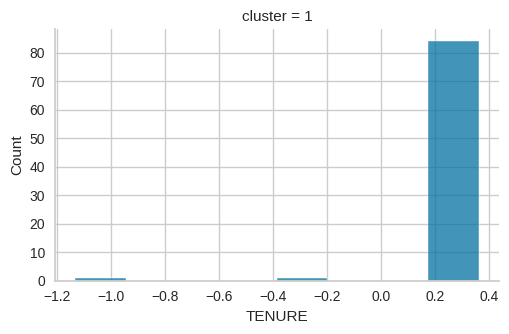

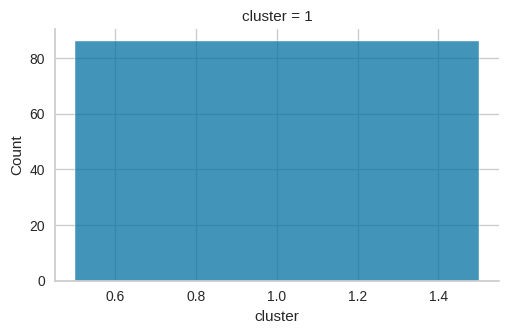

In [34]:
df_clusters1 = df_clusters[(df_clusters['cluster'] == 1)]

for i in df_clusters1:
    g = sns.FacetGrid(df_clusters1, col='cluster', height=3.5, aspect=1.5)
    g.map(sns.histplot, i)


#### Cluster 2

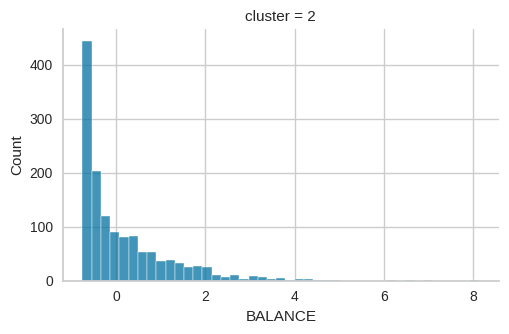

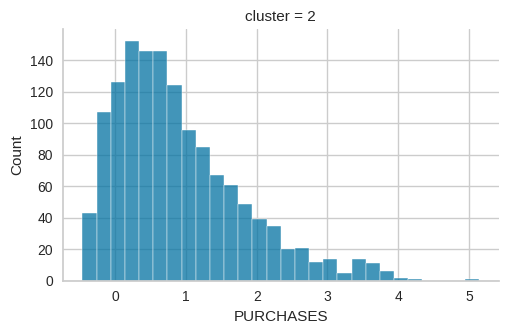

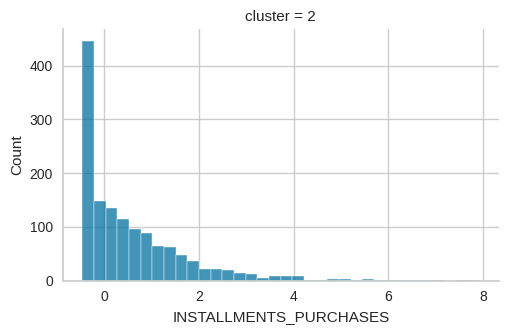

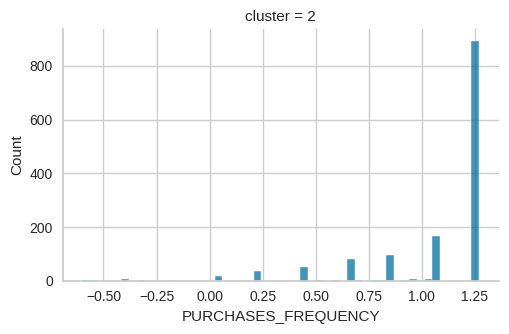

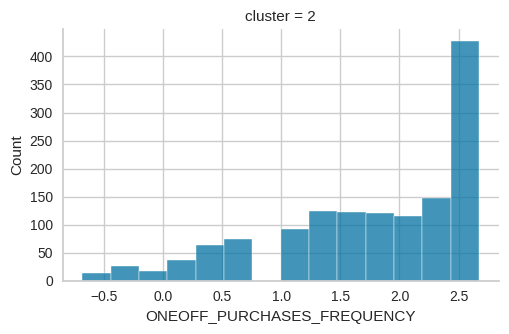

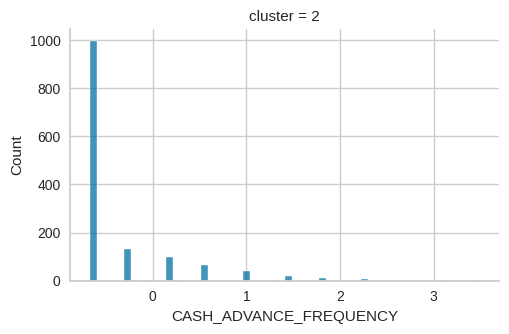

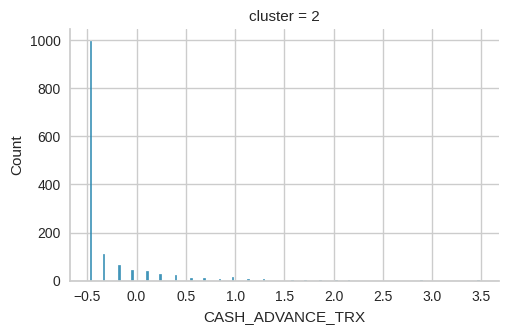

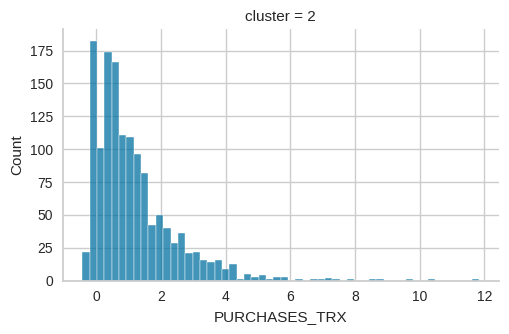

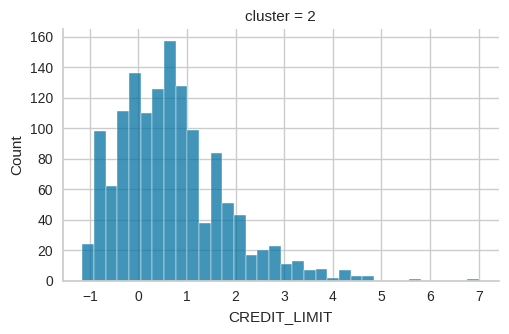

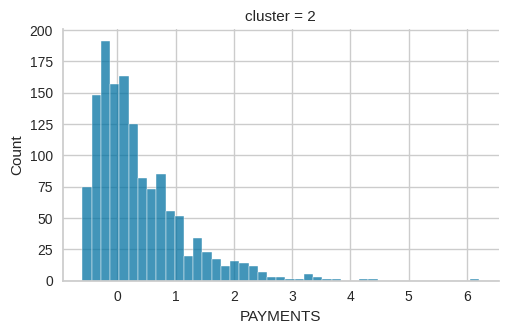

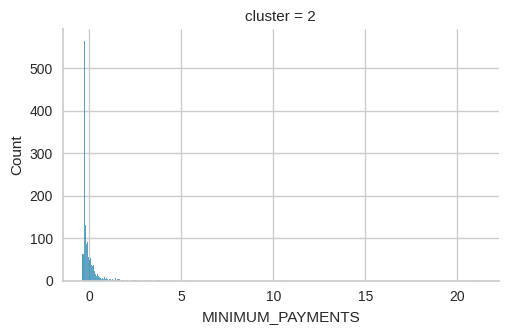

In [35]:
df_clusters2 = df_clusters[(df_clusters['cluster'] == 2)]

for i in df_clusters2:
    g = sns.FacetGrid(df_clusters2, col='cluster', height=3.5, aspect=1.5)
    g.map(sns.histplot, i)

#### Cluster 3

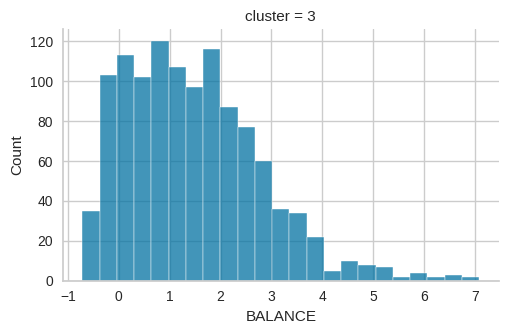

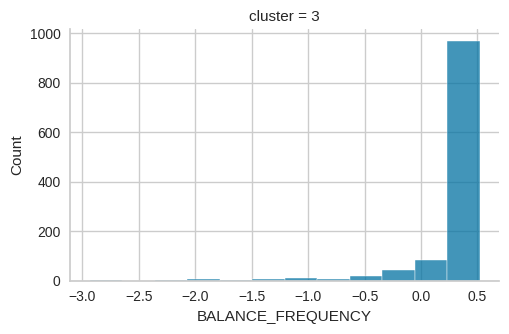

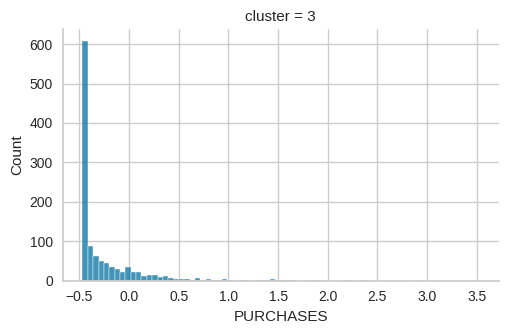

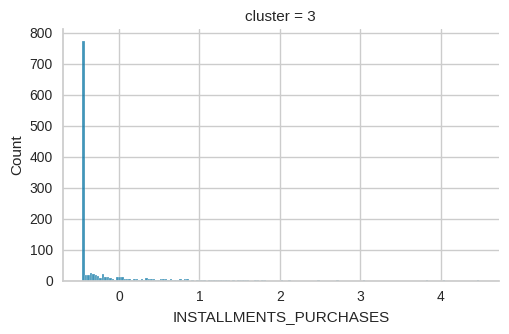

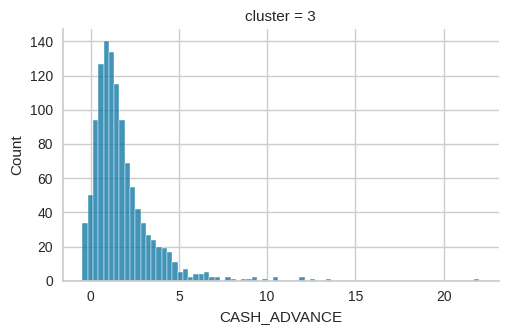

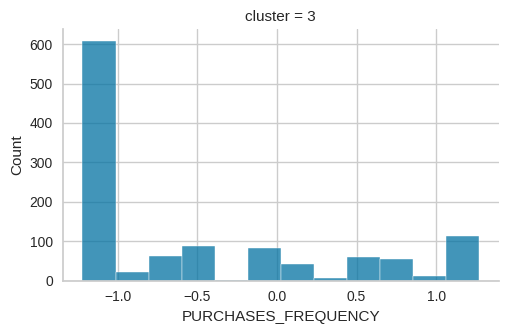

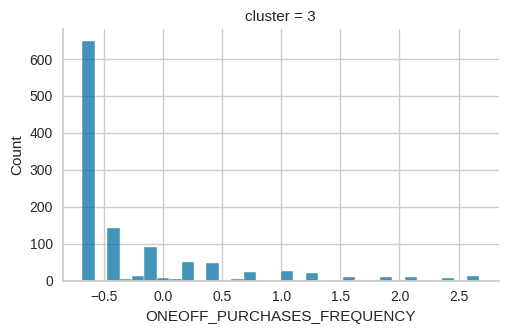

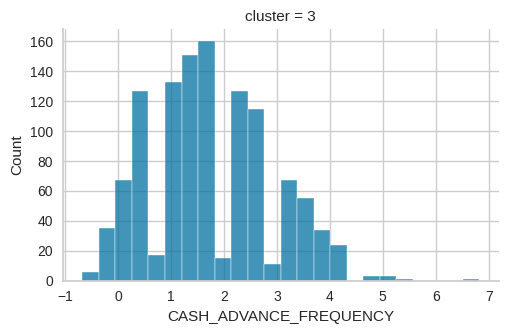

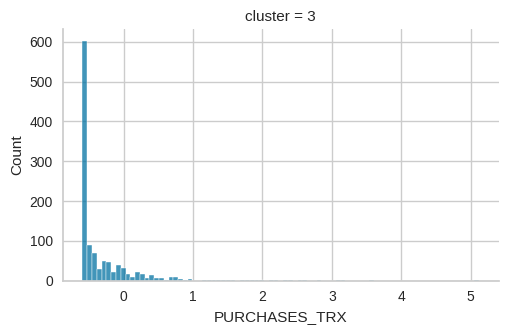

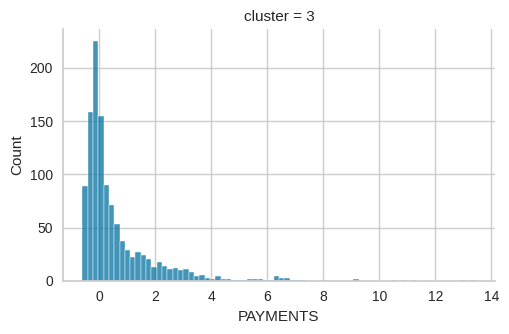

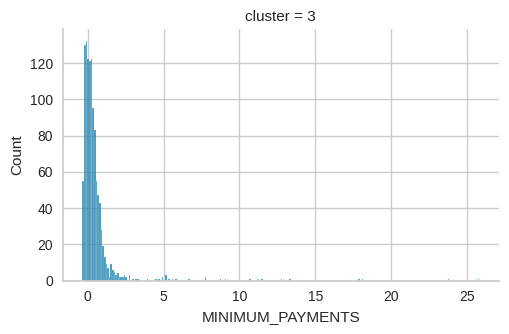

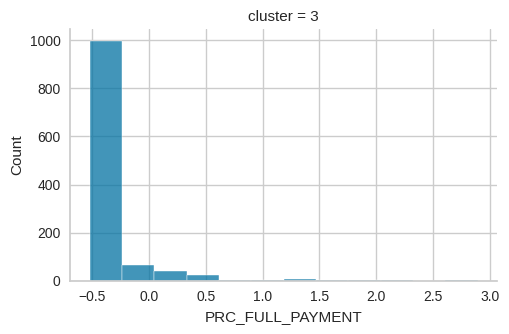

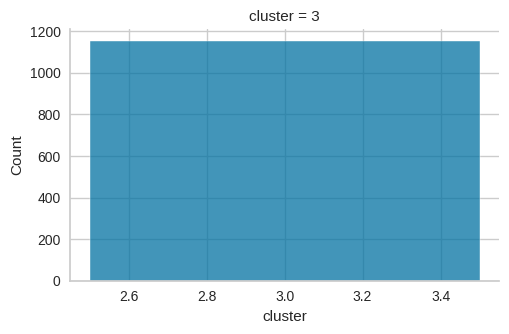

In [36]:
df_clusters3 = df_clusters[(df_clusters['cluster'] == 3)]

for i in df_clusters3:
    g = sns.FacetGrid(df_clusters3, col='cluster', height=3.5, aspect=1.5)
    g.map(sns.histplot, i)

#### Cluster 4

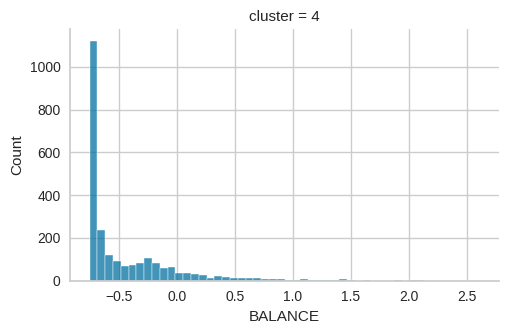

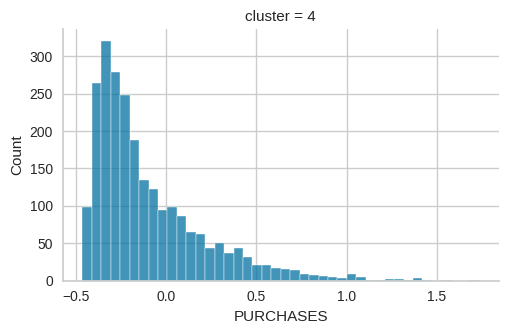

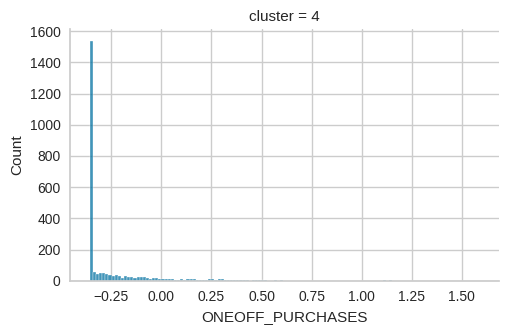

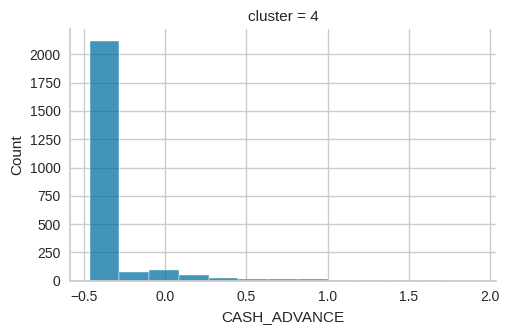

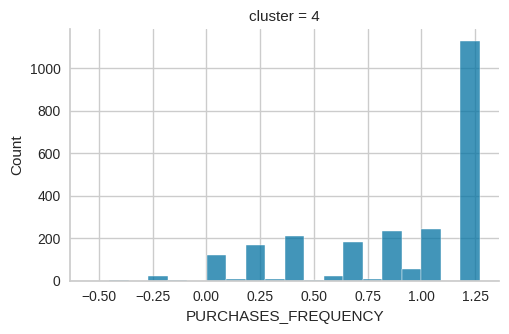

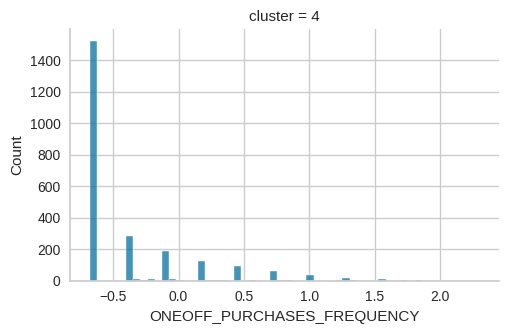

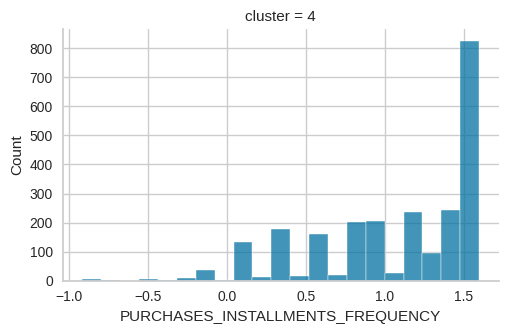

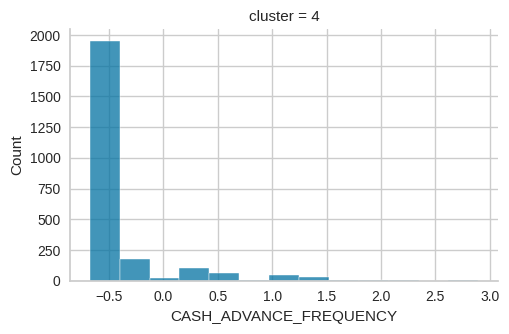

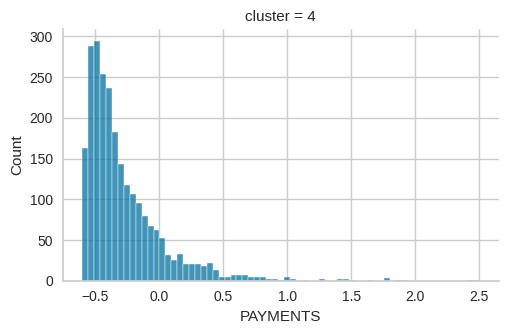

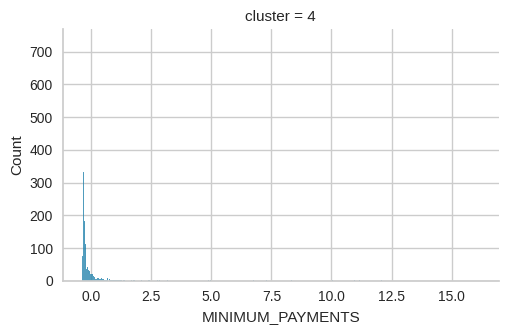

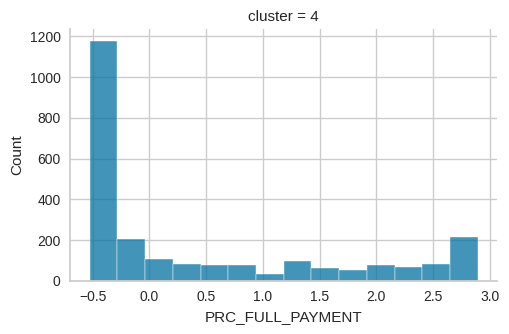

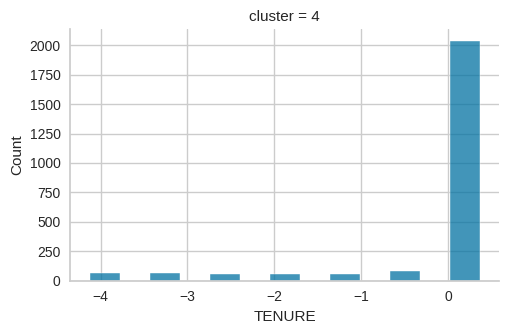

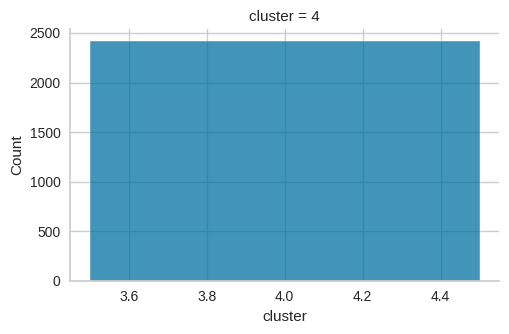

In [37]:
df_clusters4 = df_clusters[(df_clusters['cluster'] == 4)]

for i in df_clusters4:
    g = sns.FacetGrid(df_clusters4, col='cluster', height=3.5, aspect=1.5)
    g.map(sns.histplot, i)

Dapat ditarik kesimpulan bahwa masing-masing cluster memiliki karateristik yang berbeda, yaitu diantaranya:

Cluster 0 = Pengguna lebih sering memperbaharui isi saldo, melakukan pembelian dan transaksi pembayaran, sehingga limit kreditnya kecil

Cluster 1 = Pengguna sangat jarang memperbaharui isi saldo, tidak sering melakukan transaksi pembelian dan memiliki limit kredit rata-rata

Cluster 2 = pengguna cukup sering memperbaharui isi saldo, memiliki jumlah pembelian paling tinggi, sering melakukan transaksi pembelian, memiliki rata-rata jumlah transaksi dengan cash in advance, memiliki jumlah transaksi pembelian cukup tinggi dan memiliki limit kredit seimbang.

Cluster 3 = pengguna sangat sering memperbaharui isi saldo, jumlah pembelian yang tidak terlalu tinggi, tidak sering melakukan pembelian, jumlah transaksi cukup tinggi, jumlah pembayaran yang dilakukan pengguna cukup sering, dan limit kredit pengguna sangat tinggi

Cluster 4 = pengguna cukup sering memperbaharui isi saldo, jumlah pembelian sangat tinggi, frekuensi pembelian sering dilakukan, jumlah transaksi pembelian sangat tinggi, jumlah pembayaran yang dilakukan pengguna cukup tinggi, dan limit kredit pengguna sangat tinggi, dan limit kredit pengguna cukup tinggi.

### Melanjutkan Section Evaluasi Model

In [38]:
# Jumlah setiap cluster
cluster_count = df_clusters['cluster'].value_counts().sort_values(ascending=False)
cluster_count

0    3913
4    2416
2    1383
3    1152
1      86
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

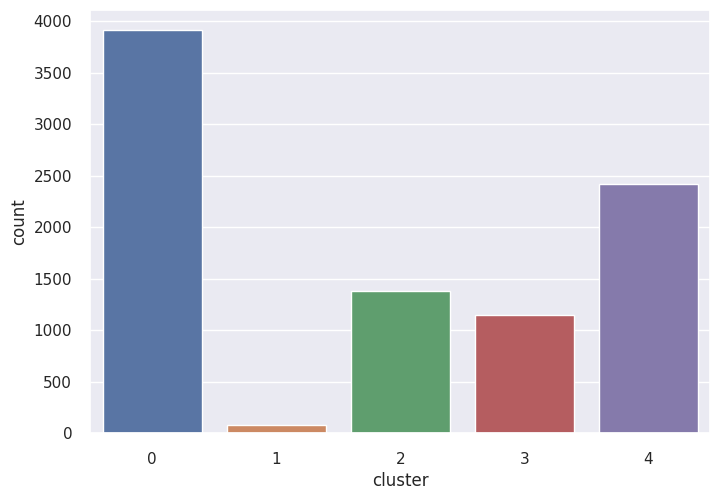

In [39]:
sns.set_theme(style="darkgrid")
sns.countplot(x="cluster", data=df_clusters)

**Setelah terbentuk 5 klaster, kita akan menambahkan label klaster ke dalam PCA_ds**

In [40]:
# Menambahkan kolom klaster dengan mengambil data dari labels

PCA_ds['Cluster'] = labels
PCA_ds.head()

Principal Component 1  Principal Component 2  Cluster
0              -1.683649              -1.072241        0
1              -1.134085               2.509150        3
2               0.969395              -0.383578        2
3              -0.888220               0.004649        0
4              -1.600021              -0.683795        0

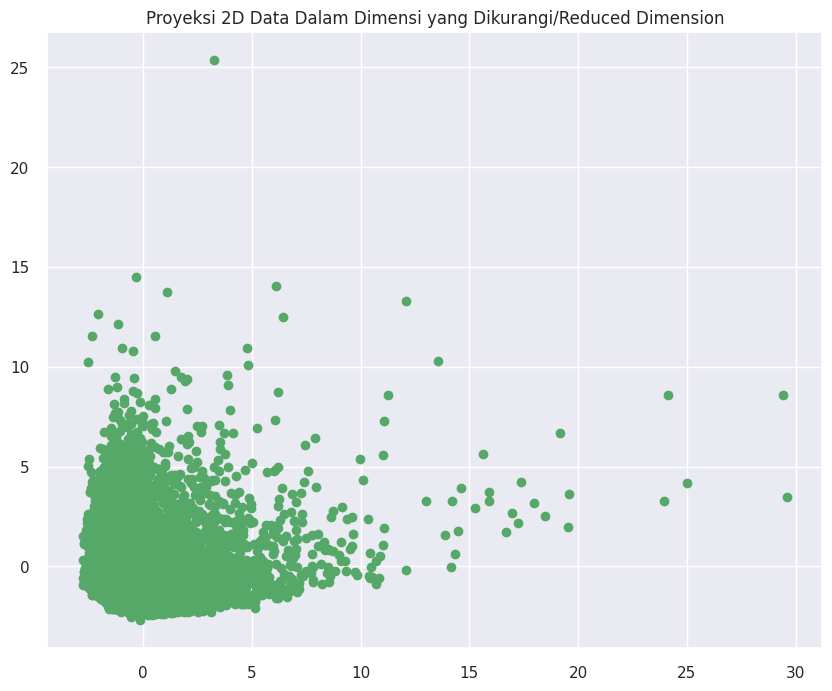

In [41]:
# Proyeksi 2D Data Dalam Dimensi yang Dikurangi/Reduced Dimension
x = PCA_ds["Principal Component 1"]
y = PCA_ds["Principal Component 2"]

# plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c='g' , marker="o" )
ax.set_title("Proyeksi 2D Data Dalam Dimensi yang Dikurangi/Reduced Dimension")
plt.show()

**Plot diatas merepresentasikan persebaran jumlah setiap cluster yang dipetakan pada proyeksi 2D**

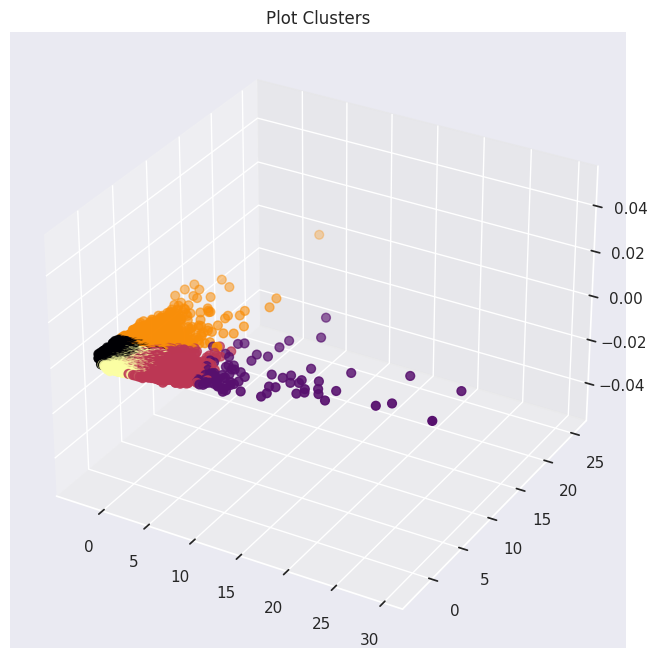

In [42]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Cluster"], marker='o', cmap = 'inferno')
ax.set_title("Plot Clusters")
plt.show()

**Plot diatas merepresentasikan persebaran jumlah setiap cluster yang dipetakan pada proyeksi 3D, dimana setiap cluster memiliki warna yang berbeda. Untuk lebih jelasnya dapat dilihat pada visualisasi scatter plot dibawah**

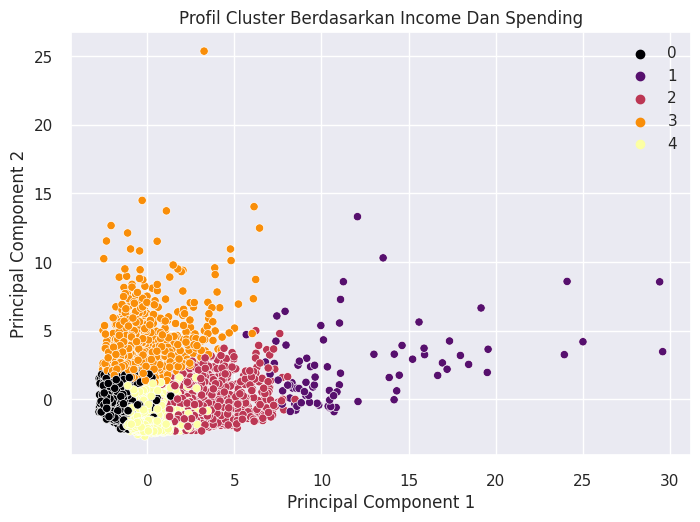

In [43]:
pl = sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue = "Cluster", data = PCA_ds, palette='inferno')
pl.set_title("Profil Cluster Berdasarkan Income Dan Spending")
plt.legend()
plt.show()

Plot diatas berbeda dengan plot 2D sebelumnya, karena pada scatter plot ini setiap cluster dipetakan pada proykesi 2D dan memiliki warna yang berbeda. Sehingga, kita lebih mudah untuk melihat persebaran cluster dan melakukan analisisnya.

### Model Inference

Tampilkan data yang telah ditambahkan kolom cluster, untuk dilakukan pengujian model

Pertama-tama, kami menampilkan terlebih dahulu df_cluster.

In [44]:
df_clusters.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   
5  0.117878           0.518084   0.154492         -0.356934   
6 -0.450277           0.518084   2.849408          3.500548   
7  0.124520           0.518084  -0.265388         -0.356934   
8 -0.264026           0.518084  -0.066330          0.041603   
9 -0.678504          -1.400712   0.130303          0.415209   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   
5                1.019822     -0.466786             0.439310   
6                0.306664     -0.466786             1.269843   
7                0.027792     -0.466786             1.269843   
8               -0.233408     -0.466786            -0.391225   
9               -0.454576     -0.466786            -0.806490   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   
5                   -0.678661                          0.550784   
6                    2.673451                          1.599199   
7                   -0.678661                          1.599199   
8                   -0.399319                         -0.287947   
9                   -0.119974                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   
5               -0.675349         -0.476070      -0.269945     -0.740504   
6               -0.675349         -0.476070       1.983008      2.475157   
7               -0.675349         -0.476070      -0.109020     -0.603083   
8               -0.675349         -0.476070      -0.390639      0.688678   
9               -0.675349         -0.476070      -0.471102      1.788050   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  cluster  
0 -0.528979         -0.302400         -0.525551  0.36068        0  
1  0.818642          0.097500          0.234227  0.36068        3  
2 -0.383805         -0.093293         -0.525551  0.36068        2  
3 -0.598688         -0.228307         -0.525551  0.36068        0  
4 -0.364368         -0.257266         -0.525551  0.36068        0  
5 -0.115060          0.669767         -0.525551  0.36068        4  
6  1.596313         -0.277297          2.893453  0.36068        2  
7 -0.364116         -0.134127         -0.525551  0.36068        4  
8 -0.360933         -0.228470         -0.525551  0.36068        0  
9 -0.196336         -0.319208         -0.525551  0.36068        0

Karena df_cluster memiliki nilai data yang telah di scaling, selanjutnya kami hanya mengambil data pada kolom clusternya untuk di dimasukan kedalam data asli. Yaitu df

In [45]:
col_clus = df_clusters['cluster']
cc = pd.DataFrame(data=col_clus)
cc.head()

cluster
0        0
1        3
2        2
3        0
4        0

In [46]:
df.shape

(8950, 17)

In [47]:
df['Cluster'] = cc
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        3  
2      622.066742        627.284787          0.000000      12        2  
3        0.000000        312.343947          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        4  
89

Tabel diatas adalah data asli yang ditambahkan data kolom cluster. Selanjutnya, data asli tersebut akan kami jadikan sebagai input pengujian

Untuk pengujian misalnya kita memasukan data pada baris 1 atau index ke 0

In [48]:
blnc                = float(input('Balance:'))
blnc_frq            = float(input('Balance Frequency:'))
prchs               = float(input('Purchases Amount:'))
oneoff_prchs        = float(input('ONEOFF Purchases Amount:'))
instal_prchs        = float(input('Installment Purchases Amount:'))
cash_advance        = float(input('Cash Advance Amount:'))
prchs_frq           = float(input('Purchases Frequency:'))
oneoff_prchs_frq    = float(input('ONEOFF Purchases Frequency:'))
instal_prchs_frq    = float(input('Installment Purchases Frequency:'))
cash_advance_frq    = float(input('Cash Advance Frequency:'))
cash_advance_trx    = float(input('Number of Cash Advance Transaction:'))
prchs_trx           = float(input('Number of Purchases Transaction:'))
credit_limit        = float(input('Credit Limit Amount:'))
payments            = float(input('Payment Amount:'))
min_payments        = float(input('Minimum Payments Amount:'))
prc_full_payments   = float(input('Percentage of Full Payments:'))
tenure              = float(input('Tenure:'))

val = [blnc, blnc_frq, prchs, oneoff_prchs, instal_prchs, cash_advance, prchs_frq, oneoff_prchs_frq, instal_prchs_frq, cash_advance_frq, cash_advance_trx,
      prchs_trx, credit_limit, payments, min_payments, prc_full_payments, tenure]

val = scaling.transform([val])

print('Input values:', val)

val_predict = kmeans.predict(val)

if val_predict == 0:
    print('Pengguna termasuk ke dalam klaster {}'.format(val_predict))
elif val_predict == 1:
    print('Pengguna termasuk ke dalam klaster {}, '.format(val_predict))
elif val_predict == 2:
    print('Pengguna termasuk ke dalam klaster {}, '.format(val_predict))
elif val_predict == 3:
    print('Pengguna termasuk ke dalam klaster {}, '.format(val_predict))
elif val_predict == 4:
    print('Pengguna termasuk ke dalam klaster {}, '.format(val_predict))
else:
    print('Pengguna tidak termasuk dalam klaster manapun')


Balance:1000
Balance Frequency:60
Purchases Amount:550
ONEOFF Purchases Amount:1
Installment Purchases Amount:200
Cash Advance Amount:0
Purchases Frequency:0
ONEOFF Purchases Frequency:0
Installment Purchases Frequency:0
Cash Advance Frequency:0
Number of Cash Advance Transaction:0
Number of Purchases Transaction:0
Credit Limit Amount:0
Payment Amount:0
Minimum Payments Amount:0
Percentage of Full Payments:0
Tenure:11
Input values: [[-2.71197559e-01  2.49578022e+02 -2.12123362e-01 -3.56331538e-01
  -2.33407653e-01 -4.66785554e-01 -1.22175806e+00 -6.78660808e-01
  -9.16995191e-01 -6.75348858e-01 -4.76069817e-01 -5.91795877e-01
  -1.23522121e+00 -5.98688260e-01 -3.62207113e-01 -5.25550971e-01
  -3.86561641e-01]]
Pengguna termasuk ke dalam klaster [2], 


### Kesimpulan

Berdasarkan hasil analisis keseluruhan, dapat disimpulkan bahwa:

1. Project ini membahas tentang mengimplementasikan algoritma Unsupervised Learning. Metode yang digunakan untuk menyelesaikan permasalahannya adalah Principal Component Analysis (PCA) dan K-Means. PCA akan digunakan untuk mereduksi atau mengurangi jumlah dimensinya, sedangkan K-Means digunakan untuk tahap clusteringnya.
2. Untuk mencari nilai optimal dalam menentukan jumlah clustering, maka digunakan teknik ELBOW METHOD.
3. Diperoleh jumlah Cluster paling optimal, yaitu 5.
4. Setelah melalui beberapa analisis dan teknik pemrosesan, data yang digunakan dapat dikelompokkan berdasarkan 5 Clustering, dimana kelima cluster tersebut memiliki kriteria yang berbeda. Yaitu :
* Pengguna lebih sering memperbaharui isi saldo, melakukan pembelian dan transaksi pembayaran, sehingga limit kreditnya kecil
* Pengguna sangat jarang memperbaharui isi saldo, tidak sering melakukan transaksi pembelian dan memiliki limit kredit rata-rata
* pengguna cukup sering memperbaharui isi saldo, memiliki jumlah pembelian paling tinggi, sering melakukan transaksi pembelian, memiliki rata-rata jumlah transaksi dengan cash in advance, memiliki jumlah transaksi pembelian cukup tinggi dan memiliki limit kredit seimbang.
* pengguna sangat sering memperbaharui isi saldo, jumlah pembelian yang tidak terlalu tinggi, tidak sering melakukan pembelian, jumlah transaksi cukup tinggi, jumlah pembayaran yang dilakukan pengguna cukup sering, dan limit kredit pengguna sangat tinggi
* pengguna cukup sering memperbaharui isi saldo, jumlah pembelian sangat tinggi, frekuensi pembelian sering dilakukan, jumlah transaksi pembelian sangat tinggi, jumlah pembayaran yang dilakukan pengguna cukup tinggi, dan limit kredit pengguna sangat tinggi, dan limit kredit pengguna cukup tinggi.
5. Dengan menggunakan PCA menghasilkan 2 komponen utama, dimana kedua komponen tersebut jika di totalkan memiliki nilai varians dari data sebesar 47%
6. Jika menganalisis nilai varians, hampir setengah informasi datanya terbuang.

### Save Model

In [49]:
joblib_file_dir = open("model_kmeans.joblib", "wb")

joblib.dump(kmeans, joblib_file_dir)
joblib_file_dir.close()

In [50]:
joblib_file_dir = open("scaling.joblib", "wb")

joblib.dump(scaling, joblib_file_dir)
joblib_file_dir.close()